<a href="https://colab.research.google.com/github/kaushikrahul1993/Finance-Domain/blob/main/Loan_Amount_Category_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Import basic libraries
import os
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()
import warnings
warnings.filterwarnings('ignore')
import math

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
path=r"/content/drive/MyDrive/Colab Notebooks/RealTime Projects/May 2024- Project by Sundaram/Finance Domain"

In [ ]:
os.chdir(path)
sys.path.append(path)

In [ ]:
!pip install openpyxl


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 250.9/250.9 kB 4.4 MB/s eta 0:00:00


In [ ]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [ ]:
desc=pd.read_excel("Description.xlsx")
desc


,Case_study1 table,Variable Name,Description
0,Internal,Total_TL,Total trade lines/accounts in Bureau
1,NaN,Tot_Closed_TL,Total closed trade lines/accounts
2,NaN,Tot_Active_TL,Total active accounts
3,NaN,Total_TL_opened_L6M,Total accounts opened in last 6 Months
4,NaN,Tot_TL_closed_L6M,Total accounds closes in last 6 months
5,NaN,pct_tl_open_L6M,Percent accounts opened in last 6 months
6,NaN,pct_tl_closed_L6M,percent accounts closed in last 6 months
7,NaN,pct_active_tl,Percent active accounts
8,NaN,pct_closed_tl,Percent closed accounts
9,NaN,Total_TL_opened_L12M,Total accounts opened in last 12 Months


In [ ]:
df1 = pd.read_excel("dataset1.xlsx")
df2 = pd.read_excel("dataset2.xlsx")

In [ ]:
data1=df1.copy()
data2=df2.copy()

In [ ]:
data1=data1.sample(frac=0.1, random_state=42)
data2=data2.sample(frac=0.1, random_state=42)

In [ ]:
data1.head()

,PROSPECTID,Total_TL,Tot_Closed_TL,Tot_Active_TL,Total_TL_opened_L6M,Tot_TL_closed_L6M,pct_tl_open_L6M,pct_tl_closed_L6M,pct_active_tl,pct_closed_tl,Total_TL_opened_L12M,Tot_TL_closed_L12M,pct_tl_open_L12M,pct_tl_closed_L12M,Tot_Missed_Pmnt,Auto_TL,CC_TL,Consumer_TL,Gold_TL,Home_TL,PL_TL,Secured_TL,Unsecured_TL,Other_TL,Age_Oldest_TL,Age_Newest_TL
8564,8565,3,1,2,0,0,0.0,0.0,0.667,0.333,0,0,0.0,0.0,0,1,0,0,0,0,0,2,1,2,51,30
26313,26314,1,0,1,1,0,1.0,0.0,1.000,0.000,1,0,1.0,0.0,1,1,0,0,0,0,0,1,0,0,1,1
12212,12213,4,3,1,0,0,0.0,0.0,0.250,0.750,0,2,0.0,0.5,0,0,0,3,0,0,0,0,4,1,37,14
37578,37579,2,0,2,0,0,0.0,0.0,1.000,0.000,0,0,0.0,0.0,0,2,0,0,0,0,0,2,0,0,36,15
21647,21648,4,4,0,0,0,0.0,0.0,0.000,1.000,0,0,0.0,0.0,0,0,0,0,4,0,0,4,0,0,62,39


In [ ]:
data1.shape

(5134, 26)

In [ ]:
data1.describe()

,PROSPECTID,Total_TL,Tot_Closed_TL,Tot_Active_TL,Total_TL_opened_L6M,Tot_TL_closed_L6M,pct_tl_open_L6M,pct_tl_closed_L6M,pct_active_tl,pct_closed_tl,Total_TL_opened_L12M,Tot_TL_closed_L12M,pct_tl_open_L12M,pct_tl_closed_L12M,Tot_Missed_Pmnt,Auto_TL,CC_TL,Consumer_TL,Gold_TL,Home_TL,PL_TL,Secured_TL,Unsecured_TL,Other_TL,Age_Oldest_TL,Age_Newest_TL
count,5134.000000,5134.000000,5134.000000,5134.000000,5134.000000,5134.000000,5134.000000,5134.000000,5134.000000,5134.000000,5134.000000,5134.000000,5134.000000,5134.000000,5134.000000,5134.000000,5134.000000,5134.000000,5134.000000,5134.000000,5134.000000,5134.000000,5134.000000,5134.000000,5134.000000,5134.000000
mean,25720.143553,4.867550,2.809116,2.058434,0.725166,0.414102,0.188550,0.089874,0.580027,0.419973,1.476237,0.708414,0.396515,0.148010,0.545384,0.577133,0.117452,1.129918,1.617452,0.070510,0.274445,2.884885,1.982665,1.080639,26.205493,-3.582587
std,14899.896724,7.522444,6.398345,2.207812,1.246324,0.951750,0.301742,0.210194,0.382352,0.382352,2.056792,1.398734,0.395411,0.258447,1.044586,0.882207,0.462120,2.240478,5.723186,0.351578,0.777171,6.546585,3.145583,2.491701,1396.895505,1396.018238
min,5.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-99999.000000,-99999.000000
25%,12725.250000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,13.000000,4.000000
50%,26036.000000,2.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.571000,0.429000,1.000000,0.000000,0.333000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,33.000000,8.000000
75%,38524.500000,5.000000,3.000000,3.000000,1.000000,1.000000,0.333000,0.037750,1.000000,0.750000,2.000000,1.000000,0.750000,0.222000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,3.000000,2.000000,1.000000,64.000000,18.000000
max,51325.000000,157.000000,157.000000,25.000000,12.000000,14.000000,1.000000,1.000000,1.000000,1.000000,25.000000,18.000000,1.000000,1.000000,16.000000,12.000000,8.000000,39.000000,157.000000,7.000000,11.000000,157.000000,46.000000,41.000000,355.000000,288.000000


In [ ]:
print(f"If Delete Rows with 'Data = -99999' then DATA LOSS :{np.round(((1-(data1!=-99999).all(axis=1).sum()/(len(data1)))*100),2)}%")

If Delete Rows with 'Data = -99999' then DATA LOSS :0.02%


In [ ]:
data1=data1[(data1!=-99999).all(axis=1)]
data1.describe()

,PROSPECTID,Total_TL,Tot_Closed_TL,Tot_Active_TL,Total_TL_opened_L6M,Tot_TL_closed_L6M,pct_tl_open_L6M,pct_tl_closed_L6M,pct_active_tl,pct_closed_tl,Total_TL_opened_L12M,Tot_TL_closed_L12M,pct_tl_open_L12M,pct_tl_closed_L12M,Tot_Missed_Pmnt,Auto_TL,CC_TL,Consumer_TL,Gold_TL,Home_TL,PL_TL,Secured_TL,Unsecured_TL,Other_TL,Age_Oldest_TL,Age_Newest_TL
count,5133.000000,5133.000000,5133.000000,5133.000000,5133.000000,5133.000000,5133.000000,5133.000000,5133.000000,5133.000000,5133.000000,5133.000000,5133.000000,5133.000000,5133.000000,5133.000000,5133.000000,5133.000000,5133.000000,5133.000000,5133.000000,5133.000000,5133.000000,5133.000000,5133.000000,5133.000000
mean,25717.410676,4.868303,2.809663,2.058640,0.725307,0.414183,0.188586,0.089892,0.579945,0.420055,1.476524,0.708553,0.396592,0.148039,0.545295,0.577245,0.117475,1.130138,1.617767,0.070524,0.274498,2.885447,1.982856,1.080655,45.692188,15.898305
std,14900.061422,7.522983,6.398848,2.207978,1.246404,0.951826,0.301760,0.210211,0.382345,0.382345,2.056889,1.398836,0.395410,0.258464,1.044669,0.882256,0.462162,2.240641,5.723699,0.351611,0.777238,6.547099,3.145860,2.491944,42.154422,22.081815
min,5.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,12725.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,13.000000,4.000000
50%,26035.000000,2.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.571000,0.429000,1.000000,0.000000,0.333000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,33.000000,8.000000
75%,38511.000000,5.000000,3.000000,3.000000,1.000000,1.000000,0.333000,0.038000,1.000000,0.750000,2.000000,1.000000,0.750000,0.222000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,3.000000,2.000000,1.000000,64.000000,18.000000
max,51325.000000,157.000000,157.000000,25.000000,12.000000,14.000000,1.000000,1.000000,1.000000,1.000000,25.000000,18.000000,1.000000,1.000000,16.000000,12.000000,8.000000,39.000000,157.000000,7.000000,11.000000,157.000000,46.000000,41.000000,355.000000,288.000000


In [ ]:
data1.isnull().sum().sum()

0

In [ ]:
data2.describe()

,PROSPECTID,time_since_recent_payment,time_since_first_deliquency,time_since_recent_deliquency,num_times_delinquent,max_delinquency_level,max_recent_level_of_deliq,num_deliq_6mts,num_deliq_12mts,num_deliq_6_12mts,max_deliq_6mts,max_deliq_12mts,num_times_30p_dpd,num_times_60p_dpd,num_std,num_std_6mts,num_std_12mts,num_sub,num_sub_6mts,num_sub_12mts,num_dbt,num_dbt_6mts,num_dbt_12mts,num_lss,num_lss_6mts,num_lss_12mts,recent_level_of_deliq,tot_enq,CC_enq,CC_enq_L6m,CC_enq_L12m,PL_enq,PL_enq_L6m,PL_enq_L12m,time_since_recent_enq,enq_L12m,enq_L6m,enq_L3m,AGE,NETMONTHLYINCOME,Time_With_Curr_Empr,pct_of_active_TLs_ever,pct_opened_TLs_L6m_of_L12m,pct_currentBal_all_TL,CC_utilization,CC_Flag,PL_utilization,PL_Flag,pct_PL_enq_L6m_of_L12m,pct_CC_enq_L6m_of_L12m,pct_PL_enq_L6m_of_ever,pct_CC_enq_L6m_of_ever,max_unsec_exposure_inPct,HL_Flag,GL_Flag,Credit_Score
count,5134.000000,5134.000000,5134.000000,5134.000000,5134.000000,5134.000000,5134.000000,5134.000000,5134.000000,5134.000000,5134.000000,5134.000000,5134.000000,5134.000000,5134.000000,5134.000000,5134.000000,5134.000000,5134.000000,5134.000000,5134.000000,5134.000000,5134.000000,5134.000000,5134.000000,5134.000000,5134.000000,5134.000000,5134.000000,5134.000000,5134.000000,5134.000000,5134.000000,5134.000000,5134.000000,5134.000000,5134.000000,5134.000000,5134.000000,5134.000000,5134.000000,5134.000000,5134.000000,5134.000000,5134.000000,5134.000000,5134.000000,5134.000000,5134.000000,5134.000000,5134.000000,5134.000000,5134.000000,5134.000000,5134.000000,5134.000000
mean,25720.143553,-7944.283210,-69062.008376,-69064.254577,1.551032,-69044.499221,13.994936,0.182119,0.458707,0.276587,-25629.378457,-21457.694975,0.735294,0.432996,8.801519,1.420140,3.143748,0.057460,0.001363,0.003896,0.023568,0.000779,0.001948,0.011297,0.000779,0.003506,12.062719,-12889.747370,-12893.899299,-12894.165563,-12894.072848,-12893.341644,-12893.863459,-12893.652902,-12669.676860,-12891.671406,-12892.559213,-12893.218153,33.949162,26385.063109,112.704324,0.580027,0.306293,-174.738144,-93103.819681,0.086093,-86461.832856,0.167121,0.189211,0.064132,0.172452,0.054728,-44045.567436,0.270744,0.051617,679.514998
std,14899.896724,27483.921941,46234.322725,46230.965751,3.960651,46260.544018,52.699890,0.692944,1.416330,0.941628,43666.450953,41064.925904,2.635802,1.935470,20.461006,3.179075,6.999289,0.717982,0.060825,0.142288,0.479900,0.055825,0.081363,0.375394,0.055825,0.159104,48.774772,33518.508942,33516.910910,33516.808421,33516.844106,33517.125514,33516.924685,33517.005719,33605.902933,33517.768368,33517.426643,33517.173023,8.826882,15699.903979,77.992865,0.382352,0.407638,4183.625255,25339.628613,0.280528,34215.292847,0.373120,0.376199,0.234708,0.354253,0.210948,49665.557219,0.444387,0.221273,20.543968
min,5.000000,-99999.000000,-99999.000000,-99999.000000,0.000000,-99999.000000,0.000000,0.000000,0.000000,0.000000,-99999.000000,-99999.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-99999.000000,-99999.000000,-99999.000000,-99999.000000,-99999.000000,-99999.000000,-99999.000000,-99999.000000,-99999.000000,-99999.000000,-99999.000000,21.000000,0.000000,5.000000,0.000000,0.000000,-99999.000000,-99999.000000,0.000000,-99999.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-99999.000000,0.000000,0.000000,513.000000
25%,12725.250000,47.000000,-99999.000000,-99999.000000,0.000000,-99999.000000,0.000000,0.000000,0.000000,0.000000,-99999.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,0.000000,0.000000,0.000000,27.000000,18000.000000,62.000000,0.250000,0.000000,0.051000,-99999.000000,0.000000,-99999.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-99999.000000,0.000000,0.000000,668.000000
50%,26036.000000,70.000000,-99999.000000,-99999.000000,0.0

In [ ]:
print(f"If Delete Rows with 'Data = -99999' then DATA LOSS :{np.round(((1-(data2!=-99999).all(axis=1).sum()/(len(data2)))*100),2)}%")

If Delete Rows with 'Data = -99999' then DATA LOSS :98.93%


In [ ]:
wrong_data_percent={}
for col in data2.columns:
  if np.round((data2[col]==-99999).sum()/len(data2),2)*100>=25:
    wrong_data_percent[col]=(np.round((data2[col]==-99999).sum()/len(data2),2)*100)
print(wrong_data_percent)



{'time_since_first_deliquency': 69.0, 'time_since_recent_deliquency': 69.0, 'max_delinquency_level': 69.0, 'max_deliq_6mts': 26.0, 'CC_utilization': 93.0, 'PL_utilization': 86.0, 'max_unsec_exposure_inPct': 44.0}


In [ ]:
data2.drop(columns=wrong_data_percent.keys(), inplace=True)

In [ ]:
data2.describe()

,PROSPECTID,time_since_recent_payment,num_times_delinquent,max_recent_level_of_deliq,num_deliq_6mts,num_deliq_12mts,num_deliq_6_12mts,max_deliq_12mts,num_times_30p_dpd,num_times_60p_dpd,num_std,num_std_6mts,num_std_12mts,num_sub,num_sub_6mts,num_sub_12mts,num_dbt,num_dbt_6mts,num_dbt_12mts,num_lss,num_lss_6mts,num_lss_12mts,recent_level_of_deliq,tot_enq,CC_enq,CC_enq_L6m,CC_enq_L12m,PL_enq,PL_enq_L6m,PL_enq_L12m,time_since_recent_enq,enq_L12m,enq_L6m,enq_L3m,AGE,NETMONTHLYINCOME,Time_With_Curr_Empr,pct_of_active_TLs_ever,pct_opened_TLs_L6m_of_L12m,pct_currentBal_all_TL,CC_Flag,PL_Flag,pct_PL_enq_L6m_of_L12m,pct_CC_enq_L6m_of_L12m,pct_PL_enq_L6m_of_ever,pct_CC_enq_L6m_of_ever,HL_Flag,GL_Flag,Credit_Score
count,5134.000000,5134.000000,5134.000000,5134.000000,5134.000000,5134.000000,5134.000000,5134.000000,5134.000000,5134.000000,5134.000000,5134.000000,5134.000000,5134.000000,5134.000000,5134.000000,5134.000000,5134.000000,5134.000000,5134.000000,5134.000000,5134.000000,5134.000000,5134.000000,5134.000000,5134.000000,5134.000000,5134.000000,5134.000000,5134.000000,5134.000000,5134.000000,5134.000000,5134.000000,5134.000000,5134.000000,5134.000000,5134.000000,5134.000000,5134.000000,5134.000000,5134.000000,5134.000000,5134.000000,5134.000000,5134.000000,5134.000000,5134.000000,5134.000000
mean,25720.143553,-7944.283210,1.551032,13.994936,0.182119,0.458707,0.276587,-21457.694975,0.735294,0.432996,8.801519,1.420140,3.143748,0.057460,0.001363,0.003896,0.023568,0.000779,0.001948,0.011297,0.000779,0.003506,12.062719,-12889.747370,-12893.899299,-12894.165563,-12894.072848,-12893.341644,-12893.863459,-12893.652902,-12669.676860,-12891.671406,-12892.559213,-12893.218153,33.949162,26385.063109,112.704324,0.580027,0.306293,-174.738144,0.086093,0.167121,0.189211,0.064132,0.172452,0.054728,0.270744,0.051617,679.514998
std,14899.896724,27483.921941,3.960651,52.699890,0.692944,1.416330,0.941628,41064.925904,2.635802,1.935470,20.461006,3.179075,6.999289,0.717982,0.060825,0.142288,0.479900,0.055825,0.081363,0.375394,0.055825,0.159104,48.774772,33518.508942,33516.910910,33516.808421,33516.844106,33517.125514,33516.924685,33517.005719,33605.902933,33517.768368,33517.426643,33517.173023,8.826882,15699.903979,77.992865,0.382352,0.407638,4183.625255,0.280528,0.373120,0.376199,0.234708,0.354253,0.210948,0.444387,0.221273,20.543968
min,5.000000,-99999.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-99999.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-99999.000000,-99999.000000,-99999.000000,-99999.000000,-99999.000000,-99999.000000,-99999.000000,-99999.000000,-99999.000000,-99999.000000,-99999.000000,21.000000,0.000000,5.000000,0.000000,0.000000,-99999.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,513.000000
25%,12725.250000,47.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,0.000000,0.000000,0.000000,27.000000,18000.000000,62.000000,0.250000,0.000000,0.051000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,668.000000
50%,26036.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,45.000000,1.000000,1.000000,0.000000,32.000000,24000.000000,96.000000,0.571000,0.000000,0.600000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,679.000000
75%,38524.500000,172.750000,1.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,1.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000

In [ ]:
for col in data2.columns:
  data2[col]= np.where(data2[col]==-99999,np.nan,data2[col])
data2.describe()

,PROSPECTID,time_since_recent_payment,num_times_delinquent,max_recent_level_of_deliq,num_deliq_6mts,num_deliq_12mts,num_deliq_6_12mts,max_deliq_12mts,num_times_30p_dpd,num_times_60p_dpd,num_std,num_std_6mts,num_std_12mts,num_sub,num_sub_6mts,num_sub_12mts,num_dbt,num_dbt_6mts,num_dbt_12mts,num_lss,num_lss_6mts,num_lss_12mts,recent_level_of_deliq,tot_enq,CC_enq,CC_enq_L6m,CC_enq_L12m,PL_enq,PL_enq_L6m,PL_enq_L12m,time_since_recent_enq,enq_L12m,enq_L6m,enq_L3m,AGE,NETMONTHLYINCOME,Time_With_Curr_Empr,pct_of_active_TLs_ever,pct_opened_TLs_L6m_of_L12m,pct_currentBal_all_TL,CC_Flag,PL_Flag,pct_PL_enq_L6m_of_L12m,pct_CC_enq_L6m_of_L12m,pct_PL_enq_L6m_of_ever,pct_CC_enq_L6m_of_ever,HL_Flag,GL_Flag,Credit_Score
count,5134.000000,4714.00000,5134.000000,5134.000000,5134.000000,5134.000000,5134.000000,4032.000000,5134.000000,5134.000000,5134.000000,5134.000000,5134.000000,5134.000000,5134.000000,5134.000000,5134.000000,5134.000000,5134.000000,5134.000000,5134.000000,5134.000000,5134.000000,4472.000000,4472.000000,4472.000000,4472.000000,4472.000000,4472.000000,4472.000000,4472.000000,4472.000000,4472.000000,4472.000000,5134.000000,5134.000000,5134.000000,5134.000000,5134.000000,5125.000000,5134.000000,5134.000000,5134.000000,5134.000000,5134.000000,5134.000000,5134.000000,5134.000000,5134.000000
mean,25720.143553,257.45227,1.551032,13.994936,0.182119,0.458707,0.276587,8.703373,0.735294,0.432996,8.801519,1.420140,3.143748,0.057460,0.001363,0.003896,0.023568,0.000779,0.001948,0.011297,0.000779,0.003506,12.062719,5.226968,0.460420,0.154741,0.261181,1.100626,0.501565,0.743292,257.875000,3.018113,1.998882,1.242397,33.949162,26385.063109,112.704324,0.580027,0.306293,0.562999,0.086093,0.167121,0.189211,0.064132,0.172452,0.054728,0.270744,0.051617,679.514998
std,14899.896724,478.74073,3.960651,52.699890,0.692944,1.416330,0.941628,30.621955,2.635802,1.935470,20.461006,3.179075,6.999289,0.717982,0.060825,0.142288,0.479900,0.055825,0.081363,0.375394,0.055825,0.159104,48.774772,5.968729,1.733728,0.640977,1.056970,2.243244,1.345818,1.716635,457.632444,4.235981,3.095476,2.084077,8.826882,15699.903979,77.992865,0.382352,0.407638,1.980423,0.280528,0.373120,0.376199,0.234708,0.354253,0.210948,0.444387,0.221273,20.543968
min,5.000000,4.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,21.000000,0.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,513.000000
25%,12725.250000,52.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,1.000000,0.000000,0.000000,27.000000,18000.000000,62.000000,0.250000,0.000000,0.057000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,668.000000
50%,26036.000000,75.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,78.000000,2.000000,1.000000,1.000000,32.000000,24000.000000,96.000000,0.571000,0.000000,0.600000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,679.000000
75%,38524.500000,214.00000,1.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,1.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,6.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,294.250000,4.000000,3.000000,2.000000,40.000000,30000.000000,133.000000,1.000000,0.667000,0.882000,0.000000,0.000000,0.000000,

In [ ]:
merge_column=set(data1.columns).intersection(set(data2.columns))
merge_column=merge_column.pop()
merge_column

'PROSPECTID'

In [ ]:
len(data1[merge_column])

5133

In [ ]:
len(set(data1[merge_column]).intersection(set(data2[merge_column])))

5133

In [ ]:
data=pd.merge(data1,data2,on=merge_column,how='outer')
data.shape

(5134, 80)

In [ ]:
data.sample(n=10)

,PROSPECTID,Total_TL,Tot_Closed_TL,Tot_Active_TL,Total_TL_opened_L6M,Tot_TL_closed_L6M,pct_tl_open_L6M,pct_tl_closed_L6M,pct_active_tl,pct_closed_tl,Total_TL_opened_L12M,Tot_TL_closed_L12M,pct_tl_open_L12M,pct_tl_closed_L12M,Tot_Missed_Pmnt,Auto_TL,CC_TL,Consumer_TL,Gold_TL,Home_TL,PL_TL,Secured_TL,Unsecured_TL,Other_TL,Age_Oldest_TL,Age_Newest_TL,time_since_recent_payment,num_times_delinquent,max_recent_level_of_deliq,num_deliq_6mts,num_deliq_12mts,num_deliq_6_12mts,max_deliq_12mts,num_times_30p_dpd,num_times_60p_dpd,num_std,num_std_6mts,num_std_12mts,num_sub,num_sub_6mts,num_sub_12mts,num_dbt,num_dbt_6mts,num_dbt_12mts,num_lss,num_lss_6mts,num_lss_12mts,recent_level_of_deliq,tot_enq,CC_enq,CC_enq_L6m,CC_enq_L12m,PL_enq,PL_enq_L6m,PL_enq_L12m,time_since_recent_enq,enq_L12m,enq_L6m,enq_L3m,MARITALSTATUS,EDUCATION,AGE,GENDER,NETMONTHLYINCOME,Time_With_Curr_Empr,pct_of_active_TLs_ever,pct_opened_TLs_L6m_of_L12m,pct_currentBal_all_TL,CC_Flag,PL_Flag,pct_PL_enq_L6m_of_L12m,pct_CC_enq_L6m_of_L12m,pct_PL_enq_L6m_of_ever,pct_CC_enq_L6m_of_ever,HL_Flag,GL_Flag,last_prod_enq2,first_prod_enq2,Credit_Score,Approved_Flag
3042,30889.0,3.0,2.0,1.0,1.0,0.0,0.333,0.000,0.333,0.667,1.0,1.0,0.333,0.333,0.0,0.0,0.0,2.0,0.0,0.0,1.0,0.0,3.0,0.0,20.0,6.0,50.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10.0,3.0,0.0,3.0,2.0,2.0,2.0,117.0,6.0,3.0,0.0,Married,12TH,27.0,M,28000.0,102.0,0.333,1.000,0.944,0.0,1.0,1.000,0.0,1.000,0.0,0.0,0.0,others,ConsumerLoan,673.0,P2
2861,29231.0,7.0,1.0,6.0,2.0,1.0,0.286,0.143,0.857,0.143,6.0,1.0,0.857,0.143,0.0,0.0,0.0,6.0,0.0,0.0,1.0,0.0,7.0,0.0,16.0,4.0,80.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,2.0,0.0,2.0,120.0,4.0,1.0,0.0,Married,GRADUATE,53.0,M,15000.0,128.0,0.857,0.333,0.611,0.0,1.0,0.000,0.0,0.000,0.0,0.0,0.0,ConsumerLoan,others,674.0,P2
3328,33498.0,2.0,0.0,2.0,1.0,0.0,0.500,0.000,1.000,0.000,1.0,0.0,0.500,0.000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,2.0,27.0,2.0,54.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,827.0,0.0,0.0,0.0,Married,12TH,29.0,M,10200.0,87.0,1.000,1.000,0.749,0.0,0.0,0.000,0.0,0.000,0.0,0.0,0.0,others,others,699.0,P2
821,8172.0,2.0,0.0,2.0,0.0,0.0,0.000,0.000,1.000,0.000,0.0,0.0,0.000,0.000,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,101.0,23.0,107.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,2.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,2.0,2.0,2.0,1.0,2.0,2.0,1.0,Married,12TH,39.0,M,39000.0,98.0,1.000,0.000,0.599,0.0,0.0,1.000,0.0,1.000,0.0,0.0,0.0,PL,HL,679.0,P2
2232,22217.0,1.0,0.0,1.0,1.0,0.0,1.000,0.000,1.000,0.000,1.0,0.0,1.000,0.000,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,4.0,4.0,110.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,2.0,2.0,2.0,46.0,4.0,4.0,1.0,Single,GRADUATE,26.0,M,41000.0,50.0,1.000,1.000,0.600,0.0,0.0,1.000,0.0,1.000,0.0,0.0,0.0,others,others,660.0,P3
1460,14502.0,3.0,3.0,0.0,0.0,0.0,0.000,0.000,0.000,1.000,0.0,0.0,0.000,0.000,0.0,1.0,0.0,0.0,2.0,0.0,0.0,3.0,0.0,0.0,83.0,43.0,1092.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10.0,0.0,0.0,0.0,3.0,1.0,3.0,59.0,3.0,1.0,1.0,Married,GRADUATE,41.0,M,60000.0,186.0,0.000,0.000,0.000,0.0,0.0,0.333,0.0,0.333,0.0,1.0,0.0,PL,others,682.0,P2
3725,37231.0,30.0,26.0,4.0,2.0,2.0,0.067,0.067,0.133,0.867,2.0,2.0,0.067,0.067,0.0,1.0,0.0,10.0,15.0,0.0,2.0,16.0,14.0,2.0,157.0,3.0,81.0,5.0,24.0,3.0,4.0,1.0,24.0,0.0,0.0,17.0,3.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,24.0,10.0,0.0,0.0,0.0,5.0,0.0,0.0,8.0,1.0,1.0,1.0,Married,GRADUATE,60.0,M,20000.0,432.0,0.133,1.000,0.523,0.0,1.0,0.000,0.0,0.000,0.0,1.0,0.0,ConsumerLoan,others,711.0,P1
4863,48785.0,1.0,0.0,1.0,0.0,0.0,0.000,0.000,1.000,0.000,1.0,0.0,1.000,0.000,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,10.0,10.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0

In [ ]:
data.drop(columns=['PROSPECTID'],inplace=True)

In [ ]:
num_col=data.describe().columns
num_col

Index(['Total_TL', 'Tot_Closed_TL', 'Tot_Active_TL', 'Total_TL_opened_L6M',
       'Tot_TL_closed_L6M', 'pct_tl_open_L6M', 'pct_tl_closed_L6M',
       'pct_active_tl', 'pct_closed_tl', 'Total_TL_opened_L12M',
       'Tot_TL_closed_L12M', 'pct_tl_open_L12M', 'pct_tl_closed_L12M',
       'Tot_Missed_Pmnt', 'Auto_TL', 'CC_TL', 'Consumer_TL', 'Gold_TL',
       'Home_TL', 'PL_TL', 'Secured_TL', 'Unsecured_TL', 'Other_TL',
       'Age_Oldest_TL', 'Age_Newest_TL', 'time_since_recent_payment',
       'num_times_delinquent', 'max_recent_level_of_deliq', 'num_deliq_6mts',
       'num_deliq_12mts', 'num_deliq_6_12mts', 'max_deliq_12mts',
       'num_times_30p_dpd', 'num_times_60p_dpd', 'num_std', 'num_std_6mts',
       'num_std_12mts', 'num_sub', 'num_sub_6mts', 'num_sub_12mts', 'num_dbt',
       'num_dbt_6mts', 'num_dbt_12mts', 'num_lss', 'num_lss_6mts',
       'num_lss_12mts', 'recent_level_of_deliq', 'tot_enq', 'CC_enq',
       'CC_enq_L6m', 'CC_enq_L12m', 'PL_enq', 'PL_enq_L6m', 'PL_enq_L12m'

In [ ]:
cat_col=data.describe(include='object').columns
cat_col

Index(['MARITALSTATUS', 'EDUCATION', 'GENDER', 'last_prod_enq2',
       'first_prod_enq2', 'Approved_Flag'],
      dtype='object')

In [ ]:
num_data=data[num_col].fillna(data[num_col].mean())
num_data.isna().sum().sum()

0

In [ ]:
cat_data=data[cat_col].fillna((data[cat_col].mode()).iloc[0])
cat_data.isna().sum().sum()

0

In [ ]:
filled_data=pd.concat([num_data,cat_data],axis=1)
filled_data.isna().sum().sum()

0

In [ ]:
def hist_plot_num(col,num_col_list, df,bin):
    col_cnt=len(num_col_list)
    div=col
    if col_cnt%div==0:
        rows = int(col_cnt/div)
        print(f"rows={rows}, Col:{div}, Total:{col_cnt}")
        j=0
        row=1
        while row<=rows:
            plt.figure(figsize=(100,10))
            plt.subplots(1,div)
            col_plot=num_col_list[j:j+div]
            for i in range(0,div):
                plt.subplot(1,div,i+1)
                sns.histplot(df[col_plot[i]],palette='bright',bins=bin)
                plt.grid(visible= True, which='both', axis = "both",)
                plt.title(col_plot[i])
            plt.tight_layout()
            plt.subplots_adjust(wspace=0.9)
            j=j+div
            row=row+1
        plt.show()
    else:
        rows = int(col_cnt/div)
        print(f"rows={rows+1}, Col:{div}, Total:{col_cnt}")
        j=0
        row=1
        while row<=rows:
            plt.figure(figsize=(100,10))
            plt.subplots(1,div)
            col_plot=num_col_list[j:j+div]
            for i in range(0,div):
                plt.subplot(1,div,i+1)
                sns.histplot(df[col_plot[i]],palette='bright',bins=bin)
                plt.title(col_plot[i])
                plt.grid(visible= True, which='both', axis = "both",)
            plt.tight_layout()
            plt.subplots_adjust(wspace=0.9)
            j=j+div
            row=row+1
        plt.figure(figsize=(100,10))
        plt.subplots(1,(col_cnt-j))
        col_plot=num_col_list[j:col_cnt]
        for i in range(0,(col_cnt-j)):
            plt.subplot(1,(col_cnt-j),i+1)
            sns.histplot(df[col_plot[i]],palette='bright',bins=bin)
            plt.title(col_plot[i])
            plt.grid(visible= True, which='both', axis = "both",)
            plt.tight_layout()
        plt.subplots_adjust(wspace=0.9)
        plt.show()

In [ ]:
def cnt_plot_cat(col,cat_col_list,df):
    col_cnt=len(cat_col_list)
    div=col
    if col_cnt%div==0:
        rows = int(col_cnt/div)
        print(f"rows={rows}, Col:{div}, Total:{col_cnt}")
        j=0
        row=1
        while row<=rows:
            plt.figure(figsize=(100,10))
            plt.subplots(1,div)
            col_plot=cat_col_list[j:j+div]
            for i in range(0,div):
                plt.subplot(1,div,i+1)
                sns.barplot(y=df[col_plot[i]].value_counts().values,x=df[col_plot[i]].value_counts().index,palette='bright')
                plt.grid(visible= True, which='both', axis = "both",)
                plt.title(col_plot[i])
            plt.tight_layout()
            plt.subplots_adjust(wspace=0.9)
            j=j+div
            row=row+1
        plt.show()
    else:
        rows = int(col_cnt/div)
        print(f"rows={rows+1}, Col:{div}, Total:{col_cnt}")
        j=0
        row=1
        while row<=rows:
            plt.figure(figsize=(100,10))
            plt.subplots(1,div)
            col_plot=cat_col_list[j:j+div]
            for i in range(0,div):
                plt.subplot(1,div,i+1)
                sns.barplot(y=df[col_plot[i]].value_counts().values,x=df[col_plot[i]].value_counts().index,palette='bright')
                plt.grid(visible= True, which='both', axis = "both",)
                plt.title(col_plot[i])
            plt.tight_layout()
            plt.subplots_adjust(wspace=0.9)
            j=j+div
            row=row+1
        plt.figure(figsize=(100,10))
        plt.subplots(1,(col_cnt-j))
        col_plot=cat_col_list[j:col_cnt]
        for i in range(0,(col_cnt-j)):
            plt.subplot(1,(col_cnt-j),i+1)
            sns.barplot(y=df[col_plot[i]].value_counts().values,x=df[col_plot[i]].value_counts().index,palette='bright')
            plt.grid(visible= True, which='both', axis = "both",)
            plt.title(col_plot[i])
            plt.tight_layout()
        plt.subplots_adjust(wspace=0.9)
        plt.show()

In [ ]:
filled_data.nunique()

,0
Total_TL,66
Tot_Closed_TL,61
Tot_Active_TL,22
Total_TL_opened_L6M,14
Tot_TL_closed_L6M,14
pct_tl_open_L6M,131
pct_tl_closed_L6M,120
pct_active_tl,187
pct_closed_tl,187
Total_TL_opened_L12M,22


In [ ]:
filled_data.sample(n=5)

,Total_TL,Tot_Closed_TL,Tot_Active_TL,Total_TL_opened_L6M,Tot_TL_closed_L6M,pct_tl_open_L6M,pct_tl_closed_L6M,pct_active_tl,pct_closed_tl,Total_TL_opened_L12M,Tot_TL_closed_L12M,pct_tl_open_L12M,pct_tl_closed_L12M,Tot_Missed_Pmnt,Auto_TL,CC_TL,Consumer_TL,Gold_TL,Home_TL,PL_TL,Secured_TL,Unsecured_TL,Other_TL,Age_Oldest_TL,Age_Newest_TL,time_since_recent_payment,num_times_delinquent,max_recent_level_of_deliq,num_deliq_6mts,num_deliq_12mts,num_deliq_6_12mts,max_deliq_12mts,num_times_30p_dpd,num_times_60p_dpd,num_std,num_std_6mts,num_std_12mts,num_sub,num_sub_6mts,num_sub_12mts,num_dbt,num_dbt_6mts,num_dbt_12mts,num_lss,num_lss_6mts,num_lss_12mts,recent_level_of_deliq,tot_enq,CC_enq,CC_enq_L6m,CC_enq_L12m,PL_enq,PL_enq_L6m,PL_enq_L12m,time_since_recent_enq,enq_L12m,enq_L6m,enq_L3m,AGE,NETMONTHLYINCOME,Time_With_Curr_Empr,pct_of_active_TLs_ever,pct_opened_TLs_L6m_of_L12m,pct_currentBal_all_TL,CC_Flag,PL_Flag,pct_PL_enq_L6m_of_L12m,pct_CC_enq_L6m_of_L12m,pct_PL_enq_L6m_of_ever,pct_CC_enq_L6m_of_ever,HL_Flag,GL_Flag,Credit_Score,MARITALSTATUS,EDUCATION,GENDER,last_prod_enq2,first_prod_enq2,Approved_Flag
1264,34.0,22.0,12.0,3.0,1.0,0.088,0.029,0.353,0.647,11.0,5.0,0.324,0.147,1.0,0.0,0.0,8.0,17.0,0.0,1.0,17.0,17.0,8.0,35.0,2.0,71.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,25.0,6.0,3.0,3.0,10.0,0.0,5.0,42.0,14.0,6.0,4.0,28.0,20000.0,125.0,0.353,0.273,0.328,0.0,1.0,0.0,1.0,0.0,0.5,1.0,0.0,669.0,Married,OTHERS,M,ConsumerLoan,PL,P2
2309,13.0,9.0,4.0,0.0,0.0,0.000,0.000,0.308,0.692,1.0,0.0,0.077,0.000,2.0,1.0,0.0,0.0,2.0,2.0,2.0,6.0,7.0,6.0,117.0,11.0,49.0,6.0,16.0,0.0,4.0,4.0,41.0,4.0,0.0,58.0,4.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10.0,5.0,0.0,0.0,0.0,4.0,2.0,2.0,47.0,2.0,2.0,2.0,60.0,25000.0,227.0,0.308,0.000,0.888,0.0,1.0,1.0,0.0,0.5,0.0,1.0,1.0,692.0,Married,GRADUATE,M,PL,HL,P2
4065,1.0,0.0,1.0,0.0,0.0,0.000,0.000,1.000,0.000,1.0,0.0,1.000,0.000,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,11.0,11.0,40.0,1.0,2.0,0.0,1.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,1.0,1.0,29.0,15000.0,15.0,1.000,0.000,0.817,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,659.0,Married,OTHERS,M,others,others,P3
604,1.0,0.0,1.0,0.0,0.0,0.000,0.000,1.000,0.000,1.0,0.0,1.000,0.000,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,9.0,9.0,67.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,21.0,2.0,1.0,1.0,46.0,45000.0,143.0,1.000,0.000,0.816,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,665.0,Married,GRADUATE,F,others,others,P3
3039,4.0,2.0,2.0,1.0,2.0,0.250,0.500,0.500,0.500,2.0,2.0,0.500,0.500,0.0,0.0,1.0,0.0,2.0,0.0,1.0,2.0,2.0,0.0,31.0,5.0,17.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,4.0,1.0,0.0,1.0,2.0,0.0,0.0,266.0,1.0,0.0,0.0,39.0,50000.0,246.0,0.500,0.500,0.272,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,662.0,Married,GRADUATE,M,CC,PL,P3


In [ ]:
new_cat_col=list(set(list(cat_col)+["HL_Flag","GL_Flag", "CC_Flag", "PL_Flag"]))
new_cat_col

['GL_Flag',
 'first_prod_enq2',
 'GENDER',
 'MARITALSTATUS',
 'Approved_Flag',
 'EDUCATION',
 'HL_Flag',
 'PL_Flag',
 'last_prod_enq2',
 'CC_Flag']

In [ ]:
new_num_col=[col for col in data.columns if col not in new_cat_col]
new_num_col

['Total_TL',
 'Tot_Closed_TL',
 'Tot_Active_TL',
 'Total_TL_opened_L6M',
 'Tot_TL_closed_L6M',
 'pct_tl_open_L6M',
 'pct_tl_closed_L6M',
 'pct_active_tl',
 'pct_closed_tl',
 'Total_TL_opened_L12M',
 'Tot_TL_closed_L12M',
 'pct_tl_open_L12M',
 'pct_tl_closed_L12M',
 'Tot_Missed_Pmnt',
 'Auto_TL',
 'CC_TL',
 'Consumer_TL',
 'Gold_TL',
 'Home_TL',
 'PL_TL',
 'Secured_TL',
 'Unsecured_TL',
 'Other_TL',
 'Age_Oldest_TL',
 'Age_Newest_TL',
 'time_since_recent_payment',
 'num_times_delinquent',
 'max_recent_level_of_deliq',
 'num_deliq_6mts',
 'num_deliq_12mts',
 'num_deliq_6_12mts',
 'max_deliq_12mts',
 'num_times_30p_dpd',
 'num_times_60p_dpd',
 'num_std',
 'num_std_6mts',
 'num_std_12mts',
 'num_sub',
 'num_sub_6mts',
 'num_sub_12mts',
 'num_dbt',
 'num_dbt_6mts',
 'num_dbt_12mts',
 'num_lss',
 'num_lss_6mts',
 'num_lss_12mts',
 'recent_level_of_deliq',
 'tot_enq',
 'CC_enq',
 'CC_enq_L6m',
 'CC_enq_L12m',
 'PL_enq',
 'PL_enq_L6m',
 'PL_enq_L12m',
 'time_since_recent_enq',
 'enq_L12m',
 'e

rows=10, Col:1, Total:10


<Figure size 10000x1000 with 0 Axes>

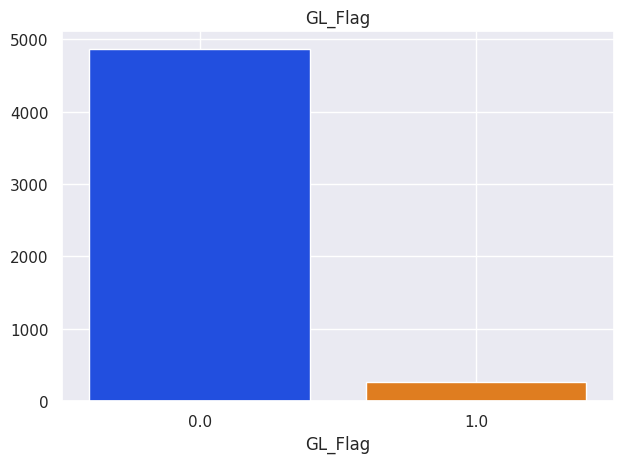

<Figure size 10000x1000 with 0 Axes>

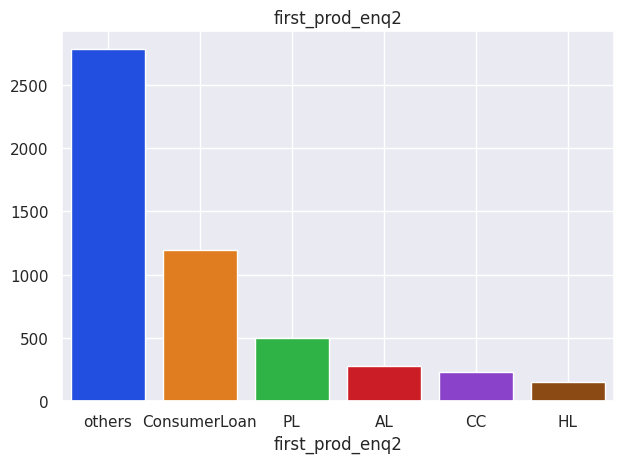

<Figure size 10000x1000 with 0 Axes>

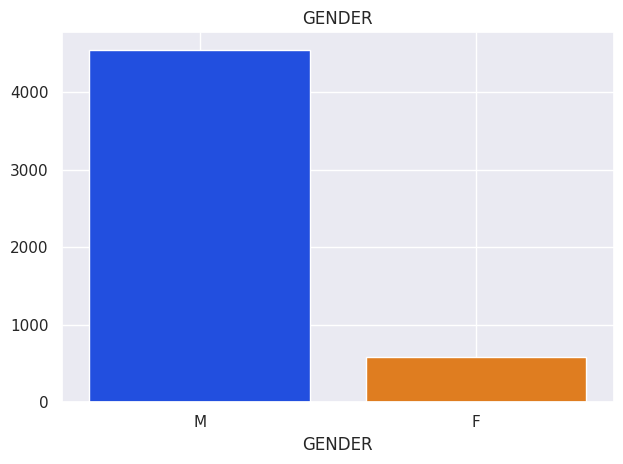

<Figure size 10000x1000 with 0 Axes>

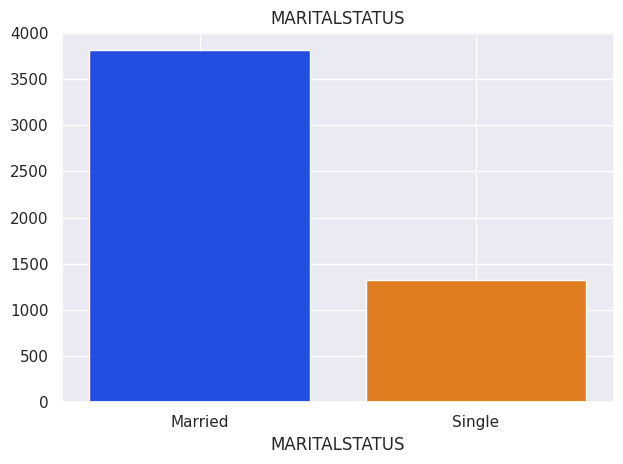

<Figure size 10000x1000 with 0 Axes>

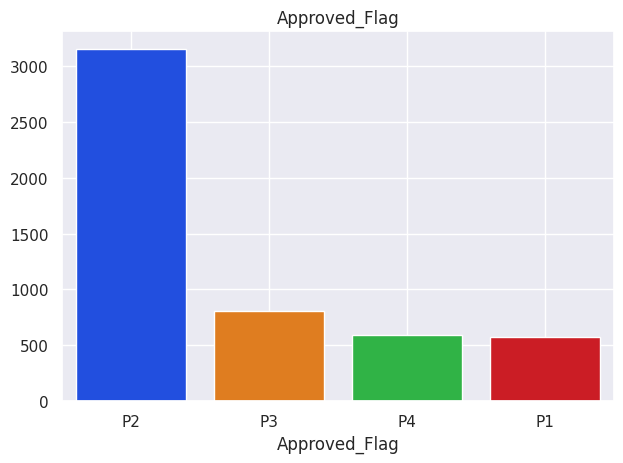

<Figure size 10000x1000 with 0 Axes>

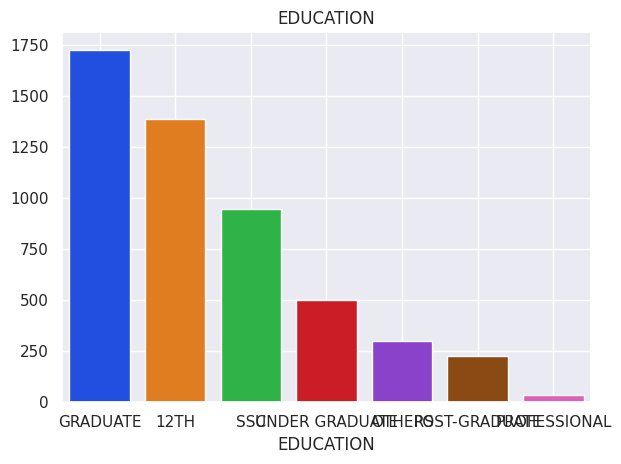

<Figure size 10000x1000 with 0 Axes>

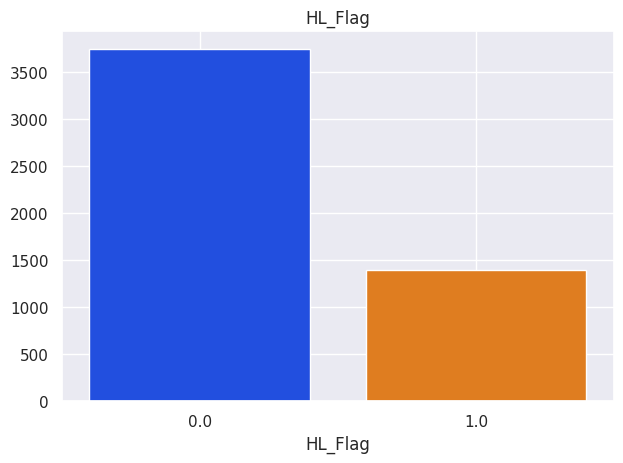

<Figure size 10000x1000 with 0 Axes>

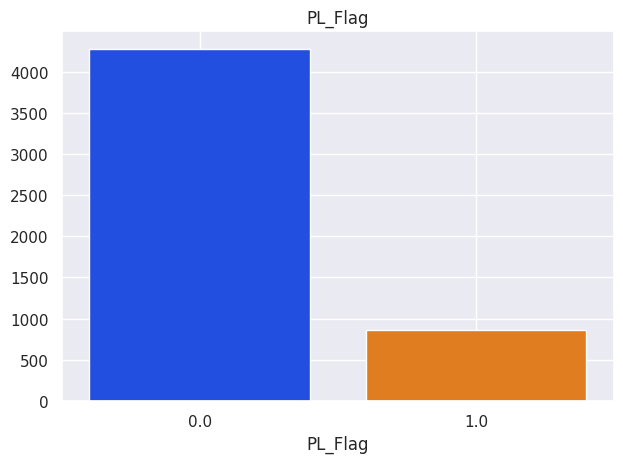

<Figure size 10000x1000 with 0 Axes>

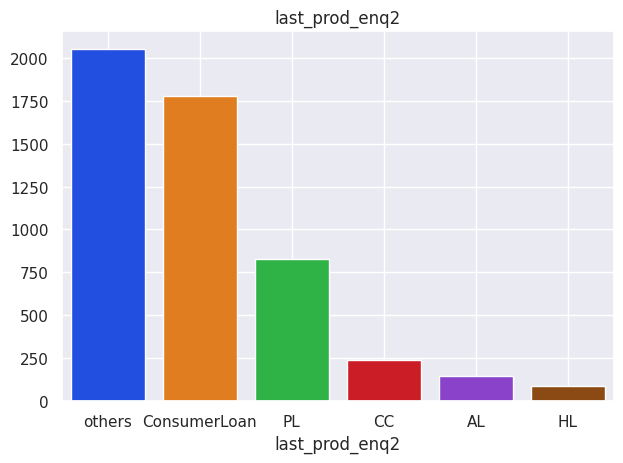

<Figure size 10000x1000 with 0 Axes>

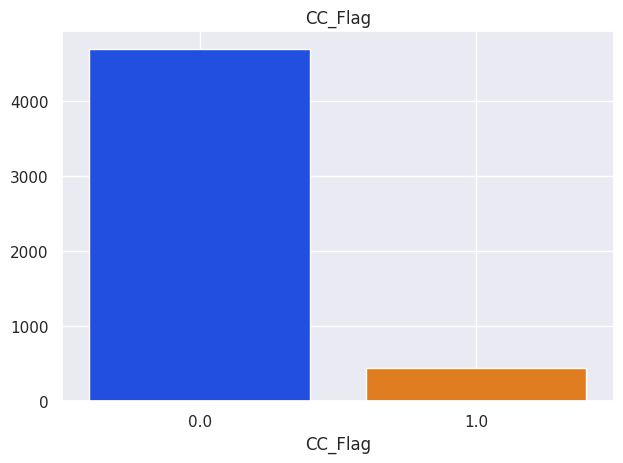

In [ ]:
cnt_plot_cat(col=1,cat_col_list=new_cat_col,df=filled_data)

rows=35, Col:2, Total:69


<Figure size 10000x1000 with 0 Axes>

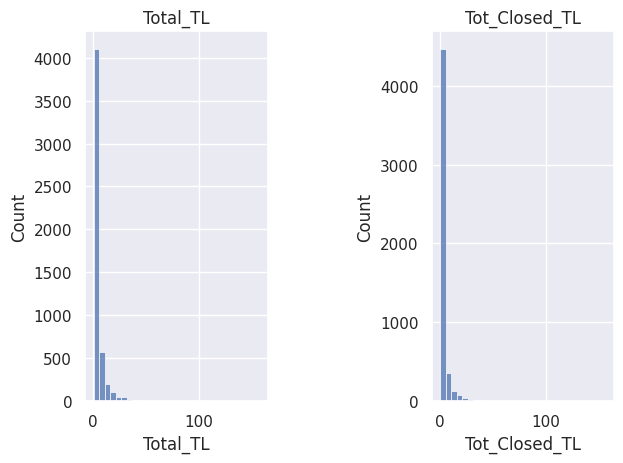

<Figure size 10000x1000 with 0 Axes>

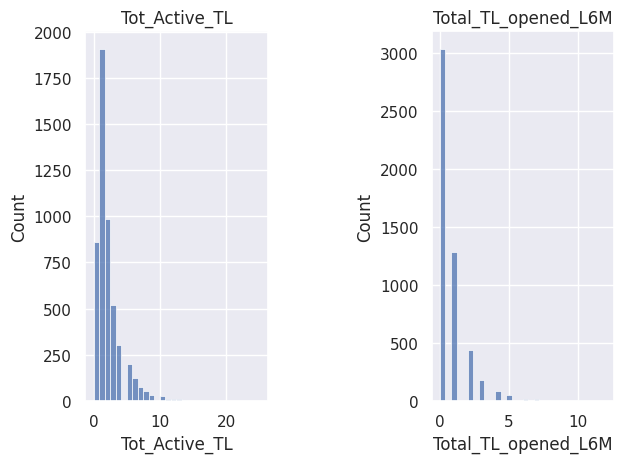

<Figure size 10000x1000 with 0 Axes>

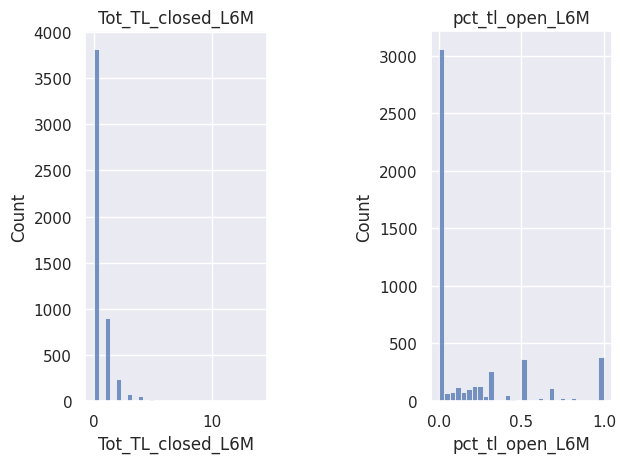

<Figure size 10000x1000 with 0 Axes>

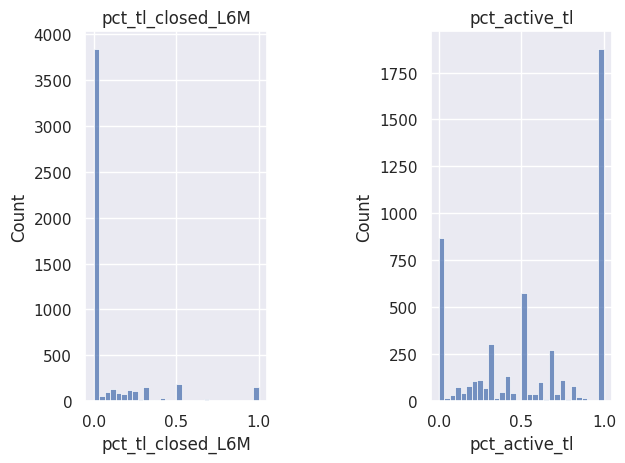

<Figure size 10000x1000 with 0 Axes>

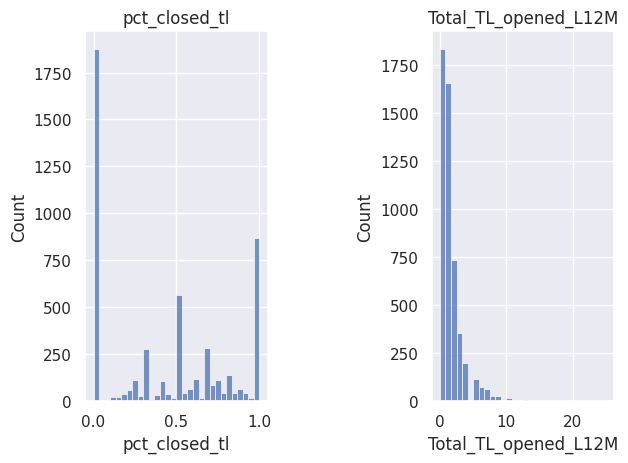

<Figure size 10000x1000 with 0 Axes>

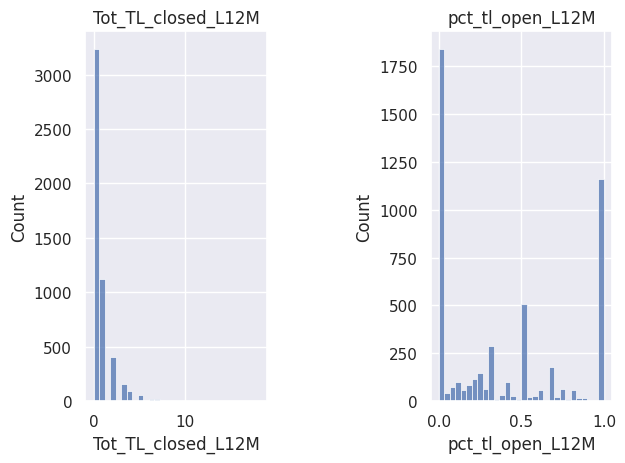

<Figure size 10000x1000 with 0 Axes>

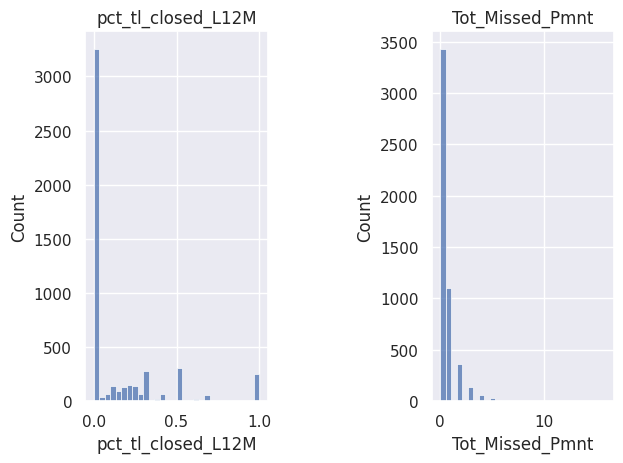

<Figure size 10000x1000 with 0 Axes>

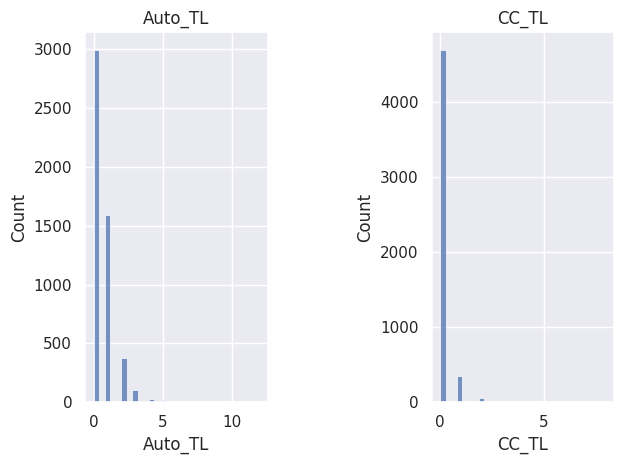

<Figure size 10000x1000 with 0 Axes>

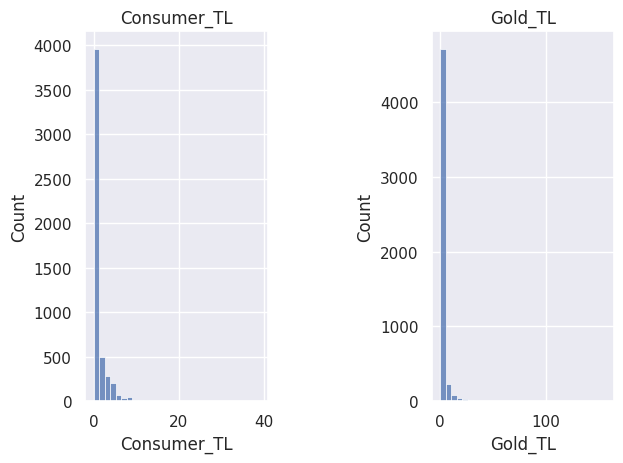

<Figure size 10000x1000 with 0 Axes>

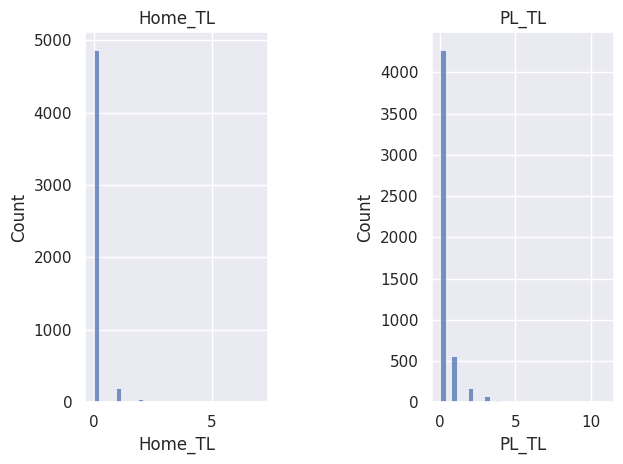

<Figure size 10000x1000 with 0 Axes>

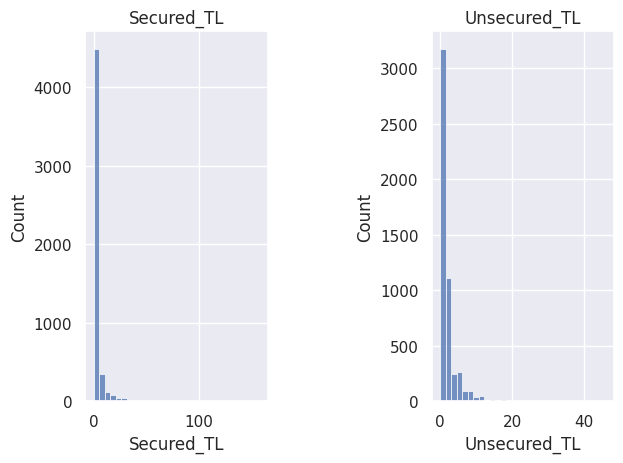

<Figure size 10000x1000 with 0 Axes>

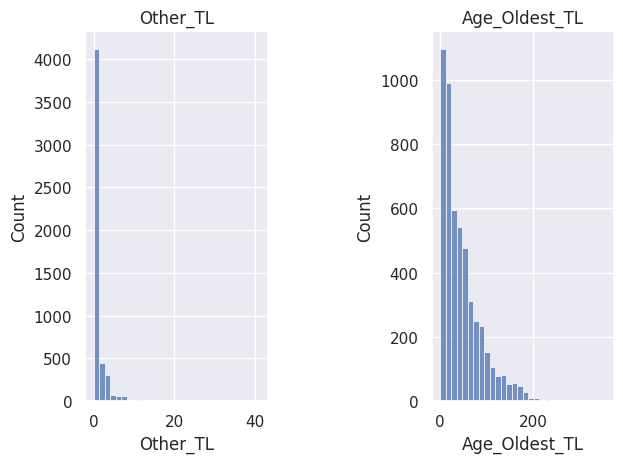

<Figure size 10000x1000 with 0 Axes>

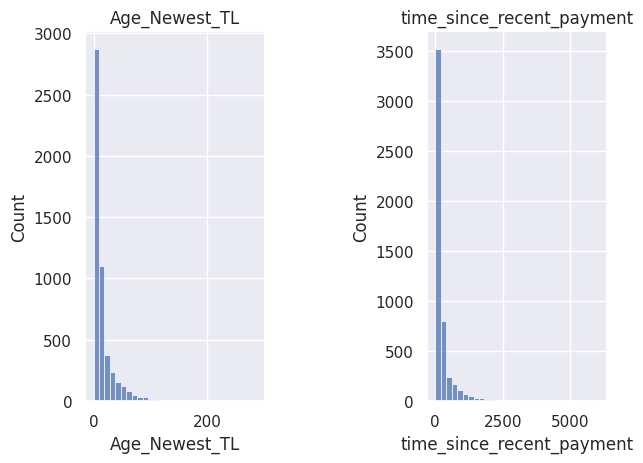

<Figure size 10000x1000 with 0 Axes>

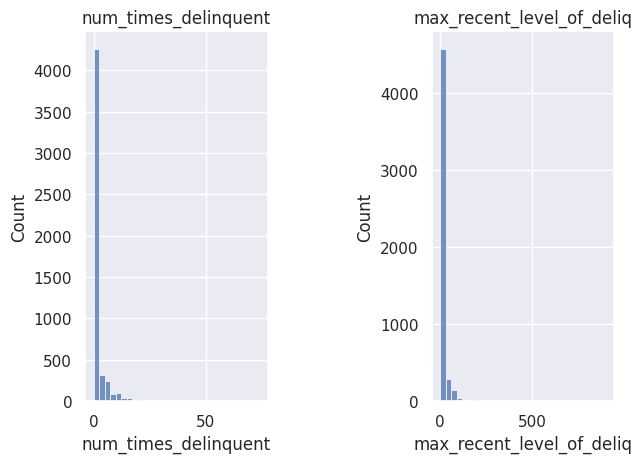

<Figure size 10000x1000 with 0 Axes>

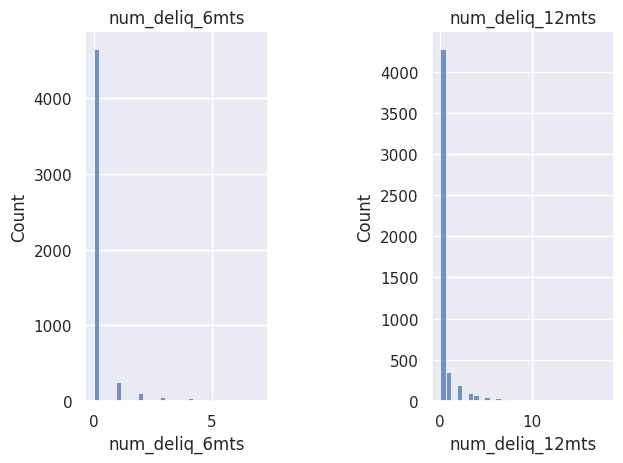

<Figure size 10000x1000 with 0 Axes>

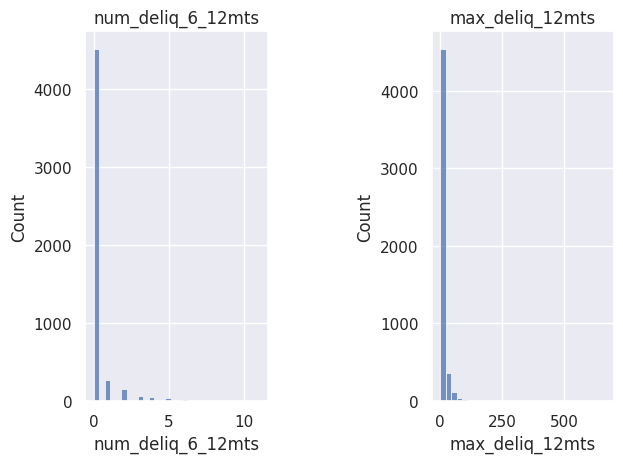

<Figure size 10000x1000 with 0 Axes>

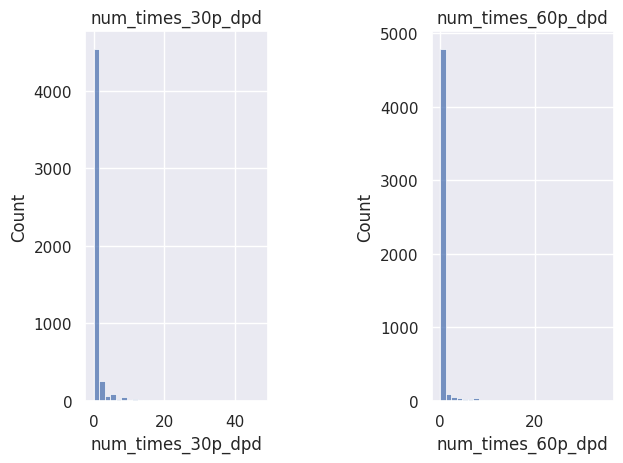

<Figure size 10000x1000 with 0 Axes>

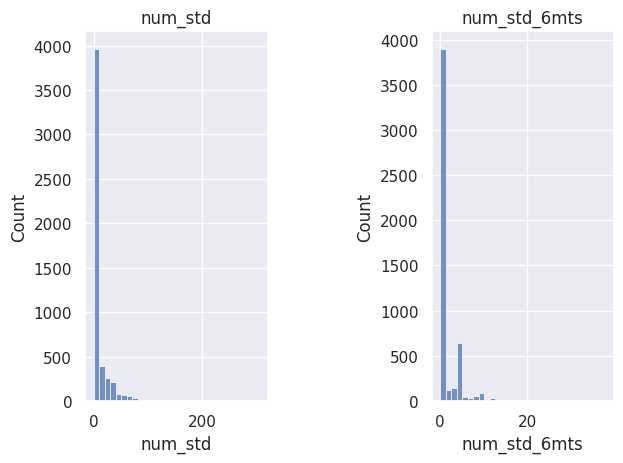

<Figure size 10000x1000 with 0 Axes>

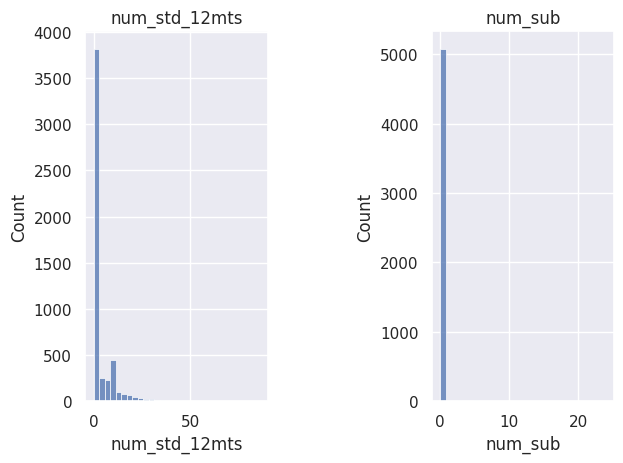

<Figure size 10000x1000 with 0 Axes>

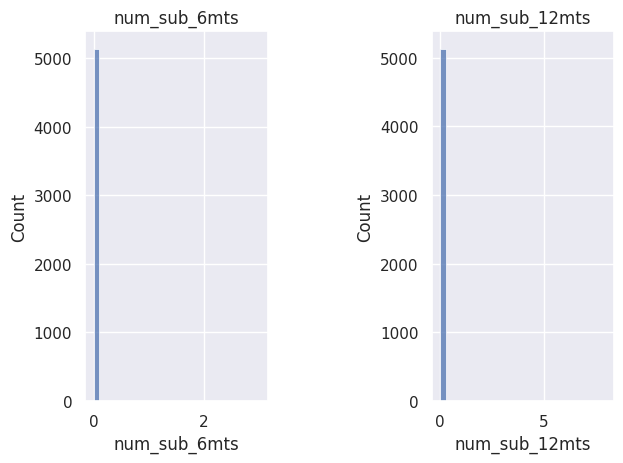

<Figure size 10000x1000 with 0 Axes>

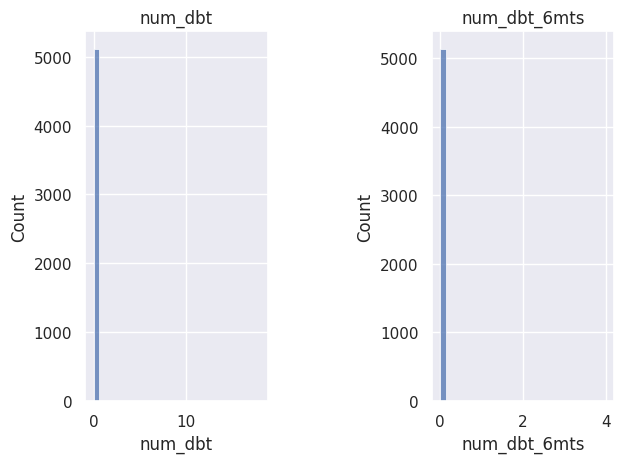

<Figure size 10000x1000 with 0 Axes>

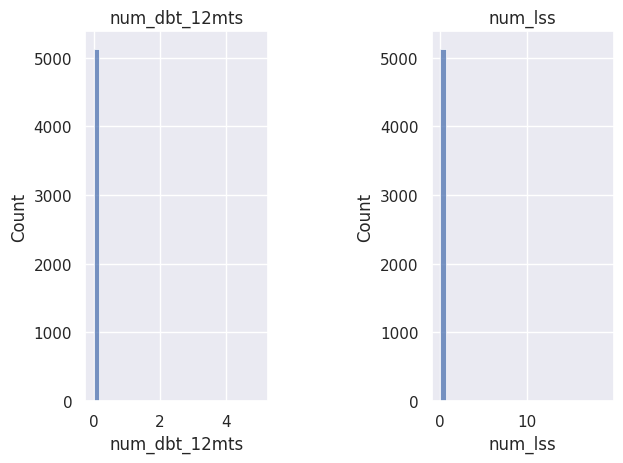

<Figure size 10000x1000 with 0 Axes>

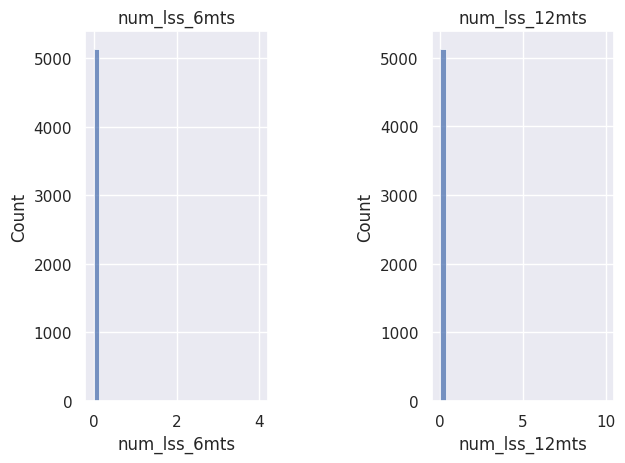

<Figure size 10000x1000 with 0 Axes>

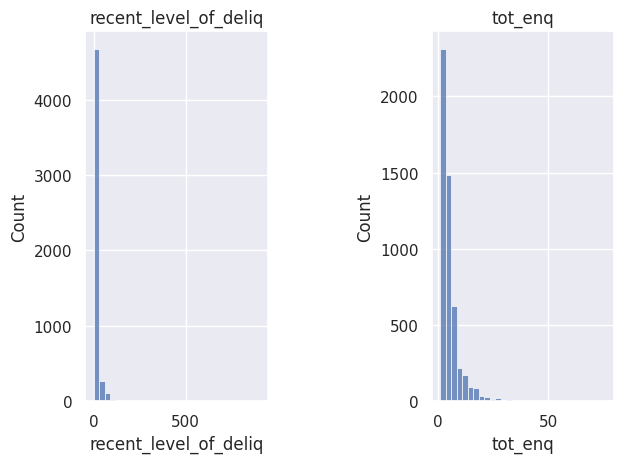

<Figure size 10000x1000 with 0 Axes>

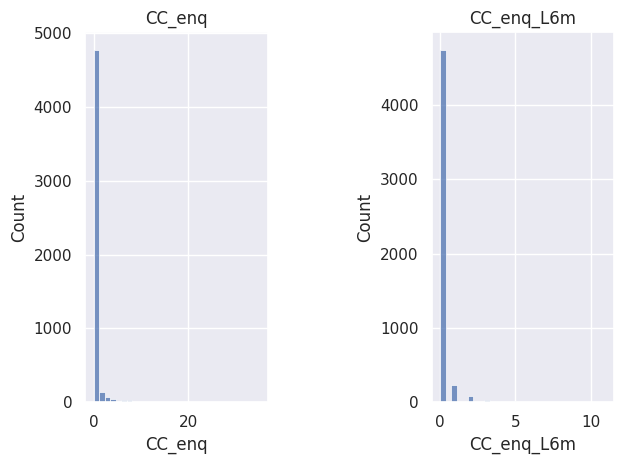

<Figure size 10000x1000 with 0 Axes>

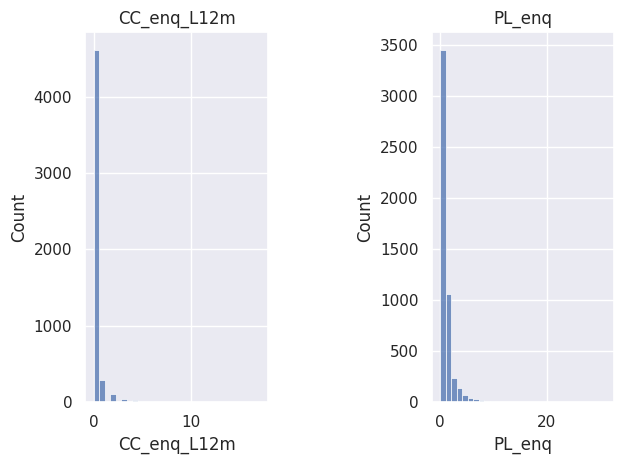

<Figure size 10000x1000 with 0 Axes>

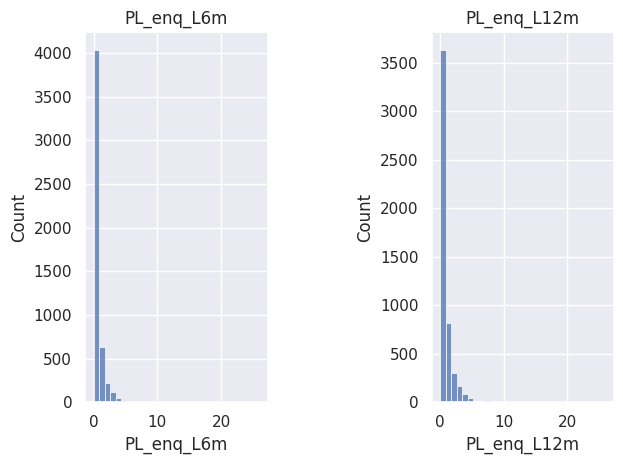

<Figure size 10000x1000 with 0 Axes>

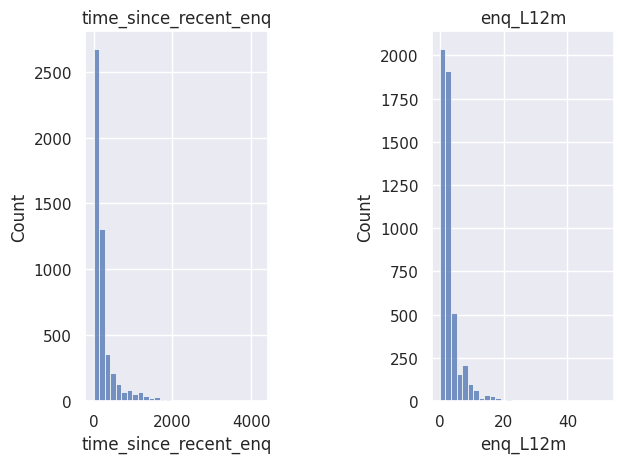

<Figure size 10000x1000 with 0 Axes>

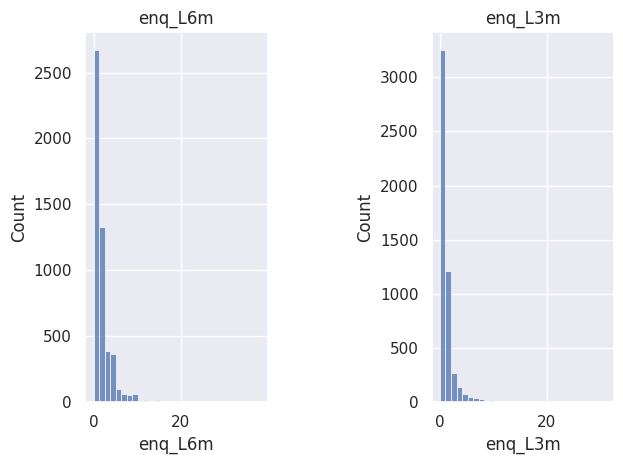

<Figure size 10000x1000 with 0 Axes>

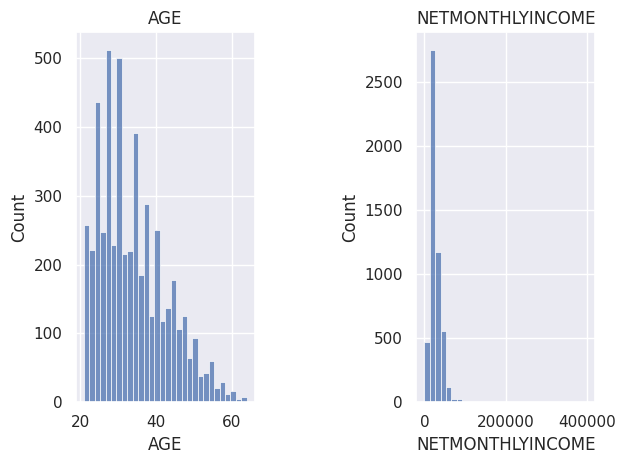

<Figure size 10000x1000 with 0 Axes>

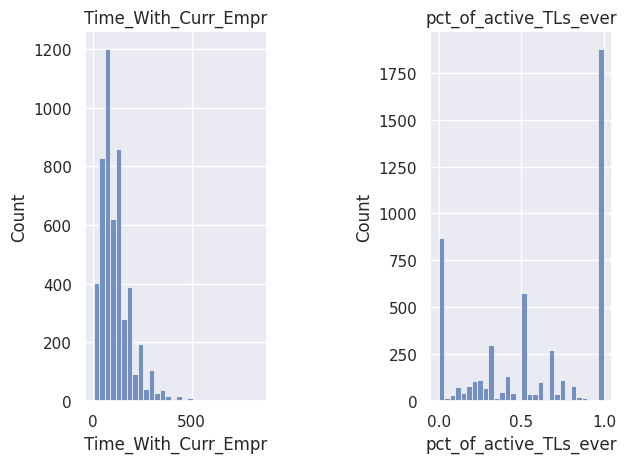

<Figure size 10000x1000 with 0 Axes>

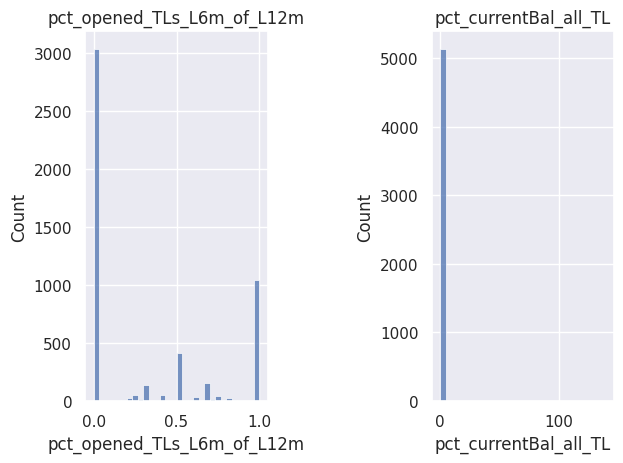

<Figure size 10000x1000 with 0 Axes>

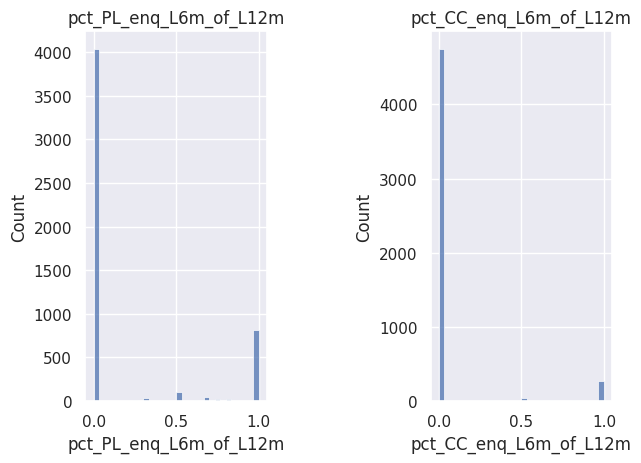

<Figure size 10000x1000 with 0 Axes>

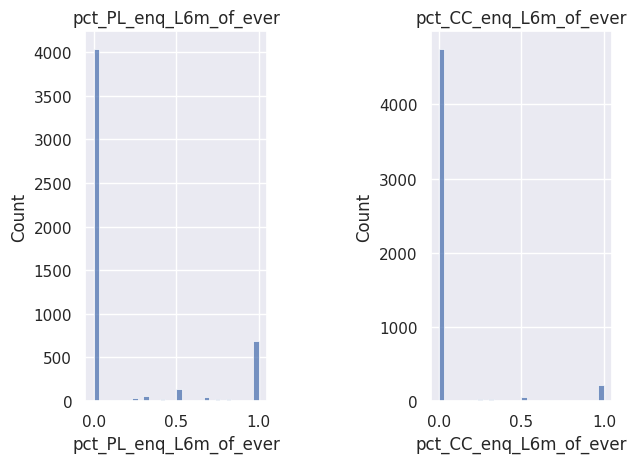

<Figure size 10000x1000 with 0 Axes>

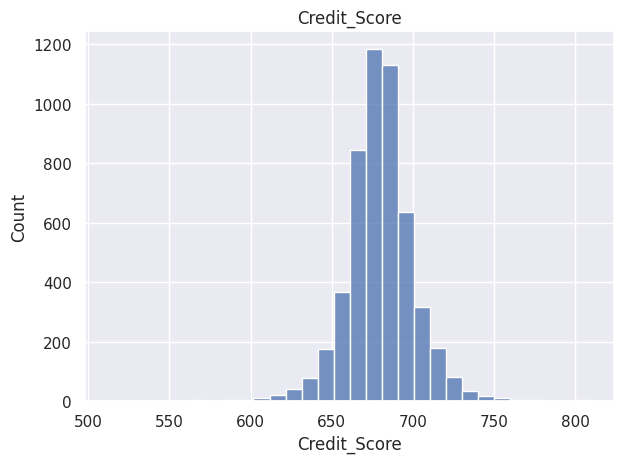

In [ ]:
hist_plot_num(col=2,num_col_list=new_num_col,df=filled_data,bin=30)

Total plots: 9
Max rows: 9, Max columns: 1


<Figure size 1000x1000 with 0 Axes>

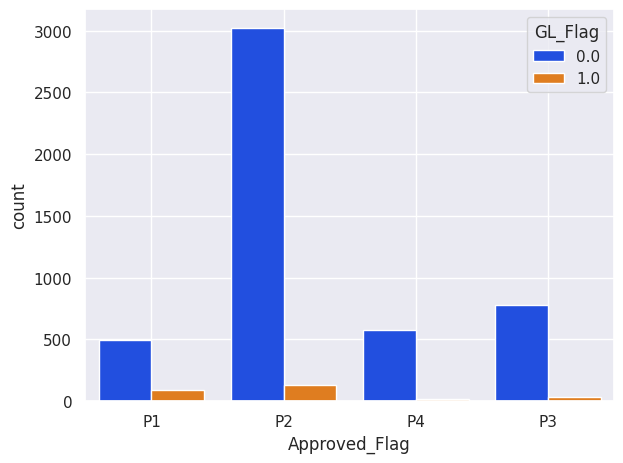

<Figure size 1000x1000 with 0 Axes>

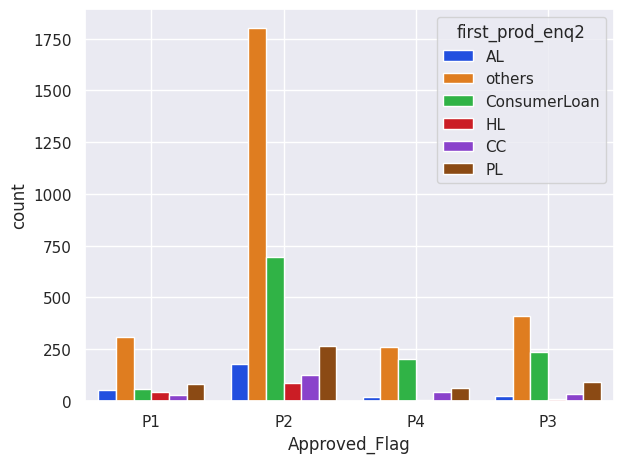

<Figure size 1000x1000 with 0 Axes>

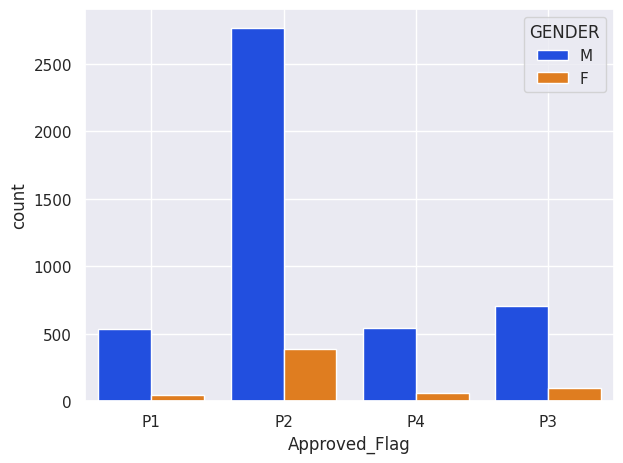

<Figure size 1000x1000 with 0 Axes>

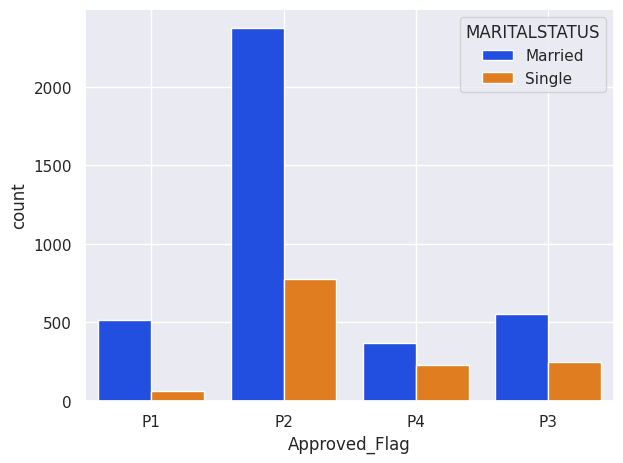

<Figure size 1000x1000 with 0 Axes>

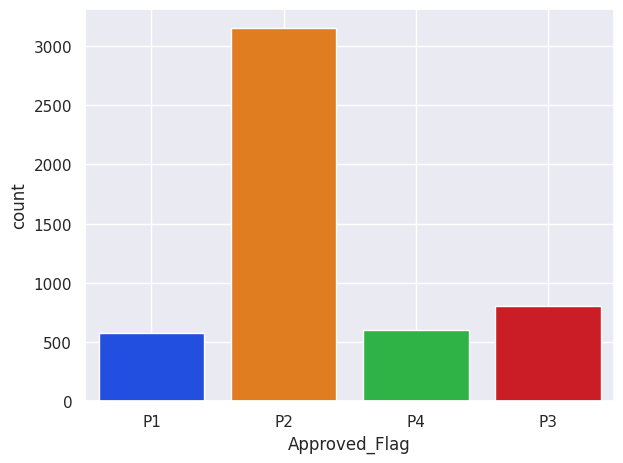

<Figure size 1000x1000 with 0 Axes>

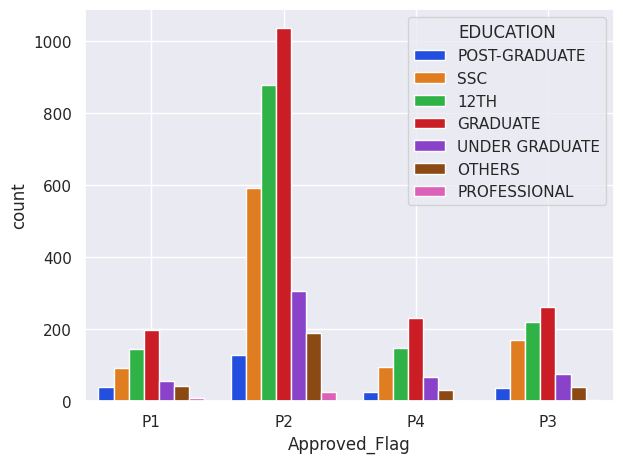

<Figure size 1000x1000 with 0 Axes>

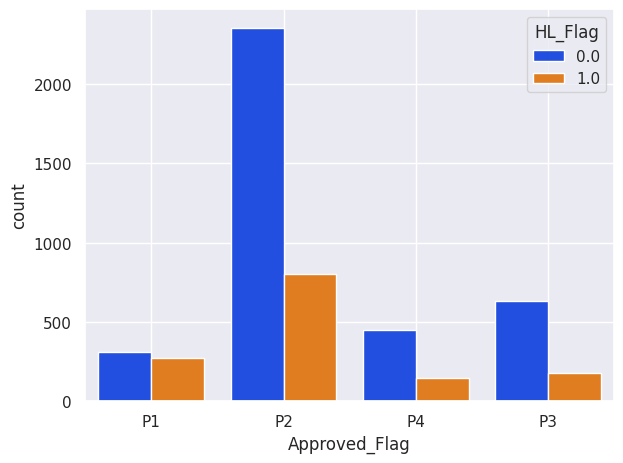

<Figure size 1000x1000 with 0 Axes>

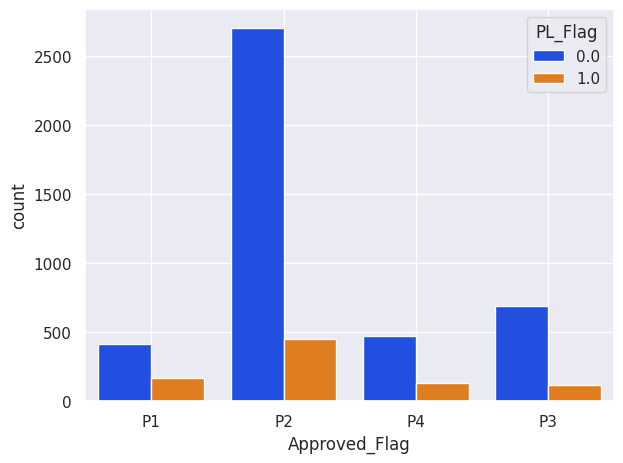

In [ ]:
total_plots=len(new_cat_col)-1
print(f"Total plots: {total_plots}")
col_div=1
max_rows=math.ceil(total_plots/col_div)
print(f"Max rows: {max_rows}, Max columns: {col_div}")
row=1
j=0
while row<max_rows:
  plt.figure(figsize=(10,10))
  plt.subplots(1,col_div)
  col_plot=new_cat_col[j:j+col_div]
  for i in range(len(col_plot)):
    plt.subplot(1,col_div,i+1)
    sns.countplot(data=filled_data,x='Approved_Flag',hue=col_plot[i], palette='bright')
    plt.grid(visible= True , which=  'both', axis = "both")
    plt.tight_layout()
    plt.subplots_adjust(hspace=0.5, wspace=0.5)
    plt.xlabel("Approved_Flag")
  j=j+col_div
  row=row+1
plt.show()

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5134 entries, 0 to 5133
Data columns (total 79 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Total_TL                    5133 non-null   float64
 1   Tot_Closed_TL               5133 non-null   float64
 2   Tot_Active_TL               5133 non-null   float64
 3   Total_TL_opened_L6M         5133 non-null   float64
 4   Tot_TL_closed_L6M           5133 non-null   float64
 5   pct_tl_open_L6M             5133 non-null   float64
 6   pct_tl_closed_L6M           5133 non-null   float64
 7   pct_active_tl               5133 non-null   float64
 8   pct_closed_tl               5133 non-null   float64
 9   Total_TL_opened_L12M        5133 non-null   float64
 10  Tot_TL_closed_L12M          5133 non-null   float64
 11  pct_tl_open_L12M            5133 non-null   float64
 12  pct_tl_closed_L12M          5133 non-null   float64
 13  Tot_Missed_Pmnt             5133 

In [ ]:
from sklearn import set_config
set_config(display='diagram')

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x=data.drop(columns=['Approved_Flag'])
y=data['Approved_Flag']

In [ ]:
from sklearn.preprocessing import LabelEncoder
label_encoder=LabelEncoder()
y=label_encoder.fit_transform(y)

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=101,stratify=y)
x_train.shape,y_train.shape,x_test.shape,y_test.shape

((4107, 78), (4107,), (1027, 78), (1027,))

In [ ]:
data[['Approved_Flag']].value_counts()

,count
Approved_Flag,
P2,3156
P3,804
P4,596
P1,578


In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import FunctionTransformer

In [ ]:
data[new_cat_col].sample(n=5)

,GL_Flag,first_prod_enq2,GENDER,MARITALSTATUS,Approved_Flag,EDUCATION,HL_Flag,PL_Flag,last_prod_enq2,CC_Flag
507,0.0,ConsumerLoan,F,Single,P2,GRADUATE,0.0,0.0,ConsumerLoan,0.0
1515,0.0,others,M,Married,P2,GRADUATE,0.0,0.0,others,0.0
3556,0.0,CC,M,Married,P3,GRADUATE,0.0,1.0,ConsumerLoan,1.0
1898,0.0,others,M,Married,P4,12TH,1.0,0.0,ConsumerLoan,0.0
438,0.0,others,M,Single,P4,12TH,0.0,0.0,ConsumerLoan,0.0


In [ ]:
from sklearn.impute import KNNImputer, SimpleImputer
modeimpute=SimpleImputer(strategy='most_frequent')
knnimpute=KNNImputer(n_neighbors=5)

In [ ]:
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
labelencoder=OrdinalEncoder()
onehotencoder=OneHotEncoder()

In [ ]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
stdscaler=StandardScaler()
minmaxscaler=MinMaxScaler()
robustscaler=RobustScaler()

In [ ]:
cat_pipe_modeimpute_onehot=Pipeline(steps=[("impute",modeimpute),("encoding",onehotencoder)])
cat_pipe_modeimpute_onehot

Pipeline(steps=[('impute', SimpleImputer(strategy='most_frequent')),
                ('encoding', OneHotEncoder())])

In [ ]:
cat_pipe_modeimpute_labelencode=Pipeline(steps=[("impute",modeimpute),("encoding",labelencoder)])
cat_pipe_modeimpute_labelencode

Pipeline(steps=[('impute', SimpleImputer(strategy='most_frequent')),
                ('encoding', OrdinalEncoder())])

In [ ]:
cat_pipe_modeimpute=Pipeline(steps=[("impute",modeimpute)])
cat_pipe_modeimpute

Pipeline(steps=[('impute', SimpleImputer(strategy='most_frequent'))])

In [ ]:
data[new_num_col].sample(n=5)

,Total_TL,Tot_Closed_TL,Tot_Active_TL,Total_TL_opened_L6M,Tot_TL_closed_L6M,pct_tl_open_L6M,pct_tl_closed_L6M,pct_active_tl,pct_closed_tl,Total_TL_opened_L12M,Tot_TL_closed_L12M,pct_tl_open_L12M,pct_tl_closed_L12M,Tot_Missed_Pmnt,Auto_TL,CC_TL,Consumer_TL,Gold_TL,Home_TL,PL_TL,Secured_TL,Unsecured_TL,Other_TL,Age_Oldest_TL,Age_Newest_TL,time_since_recent_payment,num_times_delinquent,max_recent_level_of_deliq,num_deliq_6mts,num_deliq_12mts,num_deliq_6_12mts,max_deliq_12mts,num_times_30p_dpd,num_times_60p_dpd,num_std,num_std_6mts,num_std_12mts,num_sub,num_sub_6mts,num_sub_12mts,num_dbt,num_dbt_6mts,num_dbt_12mts,num_lss,num_lss_6mts,num_lss_12mts,recent_level_of_deliq,tot_enq,CC_enq,CC_enq_L6m,CC_enq_L12m,PL_enq,PL_enq_L6m,PL_enq_L12m,time_since_recent_enq,enq_L12m,enq_L6m,enq_L3m,AGE,NETMONTHLYINCOME,Time_With_Curr_Empr,pct_of_active_TLs_ever,pct_opened_TLs_L6m_of_L12m,pct_currentBal_all_TL,pct_PL_enq_L6m_of_L12m,pct_CC_enq_L6m_of_L12m,pct_PL_enq_L6m_of_ever,pct_CC_enq_L6m_of_ever,Credit_Score
1921,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,106.0,106.0,2543.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,1991.0,0.0,0.0,0.0,32.0,15000.0,80.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0,694.0
4320,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,10.0,10.0,39.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,7.0,4.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,303.0,1.0,0.0,0.0,28.0,15000.0,126.0,1.0,0.0,0.656,0.0,0.0,0.0,0.0,689.0
1879,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,11.0,11.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,27.0,50000.0,66.0,1.0,0.0,0.841,0.0,0.0,0.0,0.0,678.0
786,2.0,2.0,0.0,0.0,2.0,0.0,1.0,0.0,1.0,1.0,2.0,0.5,1.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,2.0,0.0,14.0,10.0,110.0,1.0,16.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,16.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,294.0,1.0,0.0,0.0,51.0,35000.0,246.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0,662.0
1825,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,33.0,33.0,665.0,4.0,1.0,0.0,0.0,0.0,NaN,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,27.0,18500.0,152.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0,661.0


In [ ]:
num_pipe_knnimpute_robustscaler=Pipeline(steps=[("impute",knnimpute),("scaler",robustscaler)])
num_pipe_knnimpute_robustscaler

Pipeline(steps=[('impute', KNNImputer()), ('scaler', RobustScaler())])

In [ ]:
preprocessor_pipeline=ColumnTransformer(
    transformers=[("cat_pipe_modeimpute_onehot",cat_pipe_modeimpute_onehot,["last_prod_enq2","first_prod_enq2"]),
                  ("cat_pipe_modeimpute_labelencode",cat_pipe_modeimpute_labelencode,["GENDER","MARITALSTATUS","EDUCATION"]),
                  ("cat_pipe_modeimpute",cat_pipe_modeimpute,["HL_Flag","PL_Flag","GL_Flag","CC_Flag"]),
                  ("num_pipe_knnimpute_robustscaler",num_pipe_knnimpute_robustscaler,new_num_col),
                  ],remainder="passthrough")
preprocessor_pipeline

ColumnTransformer(remainder='passthrough',
                  transformers=[('cat_pipe_modeimpute_onehot',
                                 Pipeline(steps=[('impute',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('encoding',
                                                  OneHotEncoder())]),
                                 ['last_prod_enq2', 'first_prod_enq2']),
                                ('cat_pipe_modeimpute_labelencode',
                                 Pipeline(steps=[('impute',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('encoding',
                                                  OrdinalEncoder...
                                  'Total_TL_opened_L12M', 'Tot_TL_closed_L12M',
                                  'pct_tl_open_L12M', 'pct_tl_closed_L12M',
                                  'Tot_Missed_Pmnt', 'Auto_TL', 'CC_TL',
                                  'Consumer_TL', 'Gold_TL', 'Home_TL', 'PL_TL',
                                  'Secured_TL', 'Unsecured_TL', 'Other_TL',
                                  'Age_Oldest_TL', 'Age_Newest_TL',
                                  'time_since_recent_payment',
                                  'num_times_delinquent',
                                  'max_recent_level_of_deliq', 'num_deliq_6mts',
                                  'num_deliq_12mts', ...])])

In [ ]:
preprocessor_pipeline.fit_transform(x)

array([[ 1.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  3.36363636],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.59090909],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        , -0.31818182],
       ...,
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        , -0.13636364],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.31818182],
       [ 0.        ,  0.        ,  0.        , ...,  1.        ,
         0.        ,  1.77272727]])

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
rf_model=RandomForestClassifier(random_state=42)

In [ ]:
param_dist= {
    'n_estimators': list(range(10, 200)),
    'max_depth': list(range(1, 20)),
    'min_samples_split': list(range(2, 20)),
    'min_samples_leaf': list(range(1, 20)),
    'max_features': ['sqrt', 'log2', None],
    'criterion': ["gini",'entropy']}

In [ ]:
random_search=  RandomizedSearchCV(estimator=rf_model,param_distributions=param_dist,verbose=2,random_state=42,n_jobs=-1)

In [ ]:
!pip install imblearn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 258.3/258.3 kB 4.7 MB/s eta 0:00:00


In [ ]:
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as imbPipeline
smote=SMOTE(random_state=42)

In [ ]:
random_rfmodel_smote_pipeline=imbPipeline(steps=[("preprocessor",preprocessor_pipeline),("smote",smote),("model",random_search)])
random_rfmodel_smote_pipeline

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('cat_pipe_modeimpute_onehot',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoding',
                                                                   OneHotEncoder())]),
                                                  ['last_prod_enq2',
                                                   'first_prod_enq2']),
                                                 ('cat_pipe_modeimpute_labelencode',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer(strategy='most_freque...
                                                                       7, 8, 9,
                                                                       10, 11,
                                                                       12, 13,
                                                                       14, 15,
                                                                       16, 17,
                                                                       18, 19],
                                                         'max_features': ['sqrt',
                                                                          'log2',
                                                                          None],
                                                         'min_samples_leaf': [1,
                                                                              2,
                                                                              3,
                                                                              4,
                                                                              5,
                                                                              6,
                                                                              7,
                                                                              8,
                                                                              9,
                                                                              10,
                                                                              11,
                                                                              12,
                                                                              13,
                                                                              14,
                                                                              15,
                                                                              16,
                                                                              17,
                                                                              18,
                                                                              19],
                                                         'min_samples_split': [2,
                                                                               3,
                                                                               4,
                                                                               5,
                                                                               6,
                                                                               7,
                                                                               8,
                                                                               9,
                                                                               10,
                                                        

In [ ]:
random_rfmodel_smote_pipeline.fit(x_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('cat_pipe_modeimpute_onehot',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoding',
                                                                   OneHotEncoder())]),
                                                  ['last_prod_enq2',
                                                   'first_prod_enq2']),
                                                 ('cat_pipe_modeimpute_labelencode',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer(strategy='most_freque...
                                                                       7, 8, 9,
                                                                       10, 11,
                                                                       12, 13,
                                                                       14, 15,
                                                                       16, 17,
                                                                       18, 19],
                                                         'max_features': ['sqrt',
                                                                          'log2',
                                                                          None],
                                                         'min_samples_leaf': [1,
                                                                              2,
                                                                              3,
                                                                              4,
                                                                              5,
                                                                              6,
                                                                              7,
                                                                              8,
                                                                              9,
                                                                              10,
                                                                              11,
                                                                              12,
                                                                              13,
                                                                              14,
                                                                              15,
                                                                              16,
                                                                              17,
                                                                              18,
                                                                              19],
                                                         'min_samples_split': [2,
                                                                               3,
                                                                               4,
                                                                               5,
                                                                               6,
                                                                               7,
                                                                               8,
                                                                               9,
                                                                               10,
                                                        

In [ ]:
from sklearn.metrics import accuracy_score, classification_report

In [ ]:
print("Accuracy Report Hyper Parameter Tuning Random Forest Model\n")
print(f"Training Score: {random_rfmodel_smote_pipeline.score(x_train,y_train)}\n")
print(f"Testing Score: {random_rfmodel_smote_pipeline.score(x_test,y_test)}\n")
print(f"Training Classfication Report:\n {classification_report(y_train,random_rfmodel_smote_pipeline.predict(x_train))}")
print(f"Testing Classfication Report:\n {classification_report(y_test,random_rfmodel_smote_pipeline.predict(x_test))}")

Accuracy Report Hyper Parameter Tuning Random Forest Model

Training Score: 0.9990260530801072

Testing Score: 0.9922103213242454

Training Classfication Report:
               precision    recall  f1-score   support

           0       1.00      0.99      1.00       462
           1       1.00      1.00      1.00      2525
           2       0.99      1.00      1.00       643
           3       1.00      1.00      1.00       477

    accuracy                           1.00      4107
   macro avg       1.00      1.00      1.00      4107
weighted avg       1.00      1.00      1.00      4107

Testing Classfication Report:
               precision    recall  f1-score   support

           0       1.00      0.93      0.96       116
           1       1.00      1.00      1.00       631
           2       0.95      1.00      0.98       161
           3       1.00      1.00      1.00       119

    accuracy                           0.99      1027
   macro avg       0.99      0.98      0.99  

In [ ]:
best_rf_model=random_search.best_params_
best_rf_model

{'n_estimators': 71,
 'min_samples_split': 17,
 'min_samples_leaf': 3,
 'max_features': None,
 'max_depth': 17,
 'criterion': 'entropy'}

In [ ]:
rfmodel_smote_pipeline=imbPipeline(steps=[("preprocessor", preprocessor_pipeline),("smote",smote),("model",rf_model.set_params(**best_rf_model))])
rfmodel_smote_pipeline

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('cat_pipe_modeimpute_onehot',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoding',
                                                                   OneHotEncoder())]),
                                                  ['last_prod_enq2',
                                                   'first_prod_enq2']),
                                                 ('cat_pipe_modeimpute_labelencode',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer(strategy='most_freque...
                                                   'Unsecured_TL', 'Other_TL',
                                                   'Age_Oldest_TL',
                                                   'Age_Newest_TL',
                                                   'time_since_recent_payment',
                                                   'num_times_delinquent',
                                                   'max_recent_level_of_deliq',
                                                   'num_deliq_6mts',
                                                   'num_deliq_12mts', ...])])),
                ('smote', SMOTE(random_state=42)),
                ('model',
                 RandomForestClassifier(criterion='entropy', max_depth=17,
                                        max_features=None, min_samples_leaf=3,
                                        min_samples_split=17, n_estimators=71,
                                        random_state=42))])

In [ ]:
rfmodel_smote_pipeline.fit(x_train,y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('cat_pipe_modeimpute_onehot',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoding',
                                                                   OneHotEncoder())]),
                                                  ['last_prod_enq2',
                                                   'first_prod_enq2']),
                                                 ('cat_pipe_modeimpute_labelencode',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer(strategy='most_freque...
                                                   'Unsecured_TL', 'Other_TL',
                                                   'Age_Oldest_TL',
                                                   'Age_Newest_TL',
                                                   'time_since_recent_payment',
                                                   'num_times_delinquent',
                                                   'max_recent_level_of_deliq',
                                                   'num_deliq_6mts',
                                                   'num_deliq_12mts', ...])])),
                ('smote', SMOTE(random_state=42)),
                ('model',
                 RandomForestClassifier(criterion='entropy', max_depth=17,
                                        max_features=None, min_samples_leaf=3,
                                        min_samples_split=17, n_estimators=71,
                                        random_state=42))])

In [ ]:
print("Accuracy Report Final Model\n")
print(f"Training Score: {rfmodel_smote_pipeline.score(x_train,y_train)}\n")
print(f"Testing Score: {rfmodel_smote_pipeline.score(x_test,y_test)}\n")
print(f"Training Classfication Report:\n {classification_report(y_train,rfmodel_smote_pipeline.predict(x_train))}")
print(f"Testing Classfication Report:\n {classification_report(y_test,rfmodel_smote_pipeline.predict(x_test))}")

Accuracy Report Final Model

Training Score: 0.9990260530801072

Testing Score: 0.9922103213242454

Training Classfication Report:
               precision    recall  f1-score   support

           0       1.00      0.99      1.00       462
           1       1.00      1.00      1.00      2525
           2       0.99      1.00      1.00       643
           3       1.00      1.00      1.00       477

    accuracy                           1.00      4107
   macro avg       1.00      1.00      1.00      4107
weighted avg       1.00      1.00      1.00      4107

Testing Classfication Report:
               precision    recall  f1-score   support

           0       1.00      0.93      0.96       116
           1       1.00      1.00      1.00       631
           2       0.95      1.00      0.98       161
           3       1.00      1.00      1.00       119

    accuracy                           0.99      1027
   macro avg       0.99      0.98      0.99      1027
weighted avg       0.9

In [ ]:
from scipy.stats import chi2_contingency

In [ ]:
chi2_contingency(pd.crosstab(filled_data['Approved_Flag'],data['EDUCATION']))

Chi2ContingencyResult(statistic=34.629330905480145, pvalue=0.010520351190942412, dof=18, expected_freq=array([[ 156.37748344,  194.54304636,   33.88741722,   25.66887417,
           4.16556291,  106.8410596 ,   56.51655629],
       [ 853.85352552, 1062.24542267,  185.03233346,  140.15738216,
          22.74483833,  583.37436697,  308.59213089],
       [ 217.52162057,  270.61005064,   47.13751461,   35.70549279,
           5.79431243,  148.6162836 ,   78.61472536],
       [ 161.24737047,  200.60148033,   34.94273471,   26.46825088,
           4.29528633,  110.16828983,   58.27658746]]))

In [ ]:
imp_cat_col=list()
for col in new_cat_col:
    chi2, pval,_,_ = chi2_contingency(pd.crosstab(filled_data[col], data['Approved_Flag']))
    if pval<=0.05:
      imp_cat_col.append(col)
      print(col, '---', pval)
      print(f"For {col} '''Null Hypothesis: There is no association between the two variables ''' is rejected  and the distribution of one variable depends on the other. \n ")
print(f"Final Important Categorical Column are:\n {imp_cat_col}")

GL_Flag --- 1.8469044451635336e-27
For GL_Flag '''Null Hypothesis: There is no association between the two variables ''' is rejected  and the distribution of one variable depends on the other. 
 
first_prod_enq2 --- 2.405244233209133e-38
For first_prod_enq2 '''Null Hypothesis: There is no association between the two variables ''' is rejected  and the distribution of one variable depends on the other. 
 
GENDER --- 0.0024711358434120635
For GENDER '''Null Hypothesis: There is no association between the two variables ''' is rejected  and the distribution of one variable depends on the other. 
 
MARITALSTATUS --- 1.1030676922256816e-28
For MARITALSTATUS '''Null Hypothesis: There is no association between the two variables ''' is rejected  and the distribution of one variable depends on the other. 
 
Approved_Flag --- 0.0
For Approved_Flag '''Null Hypothesis: There is no association between the two variables ''' is rejected  and the distribution of one variable depends on the other. 
 
EDU

In [ ]:
!pip install statsmodels

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.8/10.8 MB 85.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 232.9/232.9 kB 12.6 MB/s eta 0:00:00


In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [ ]:
data[new_num_col].sample(n=5)

,Total_TL,Tot_Closed_TL,Tot_Active_TL,Total_TL_opened_L6M,Tot_TL_closed_L6M,pct_tl_open_L6M,pct_tl_closed_L6M,pct_active_tl,pct_closed_tl,Total_TL_opened_L12M,Tot_TL_closed_L12M,pct_tl_open_L12M,pct_tl_closed_L12M,Tot_Missed_Pmnt,Auto_TL,CC_TL,Consumer_TL,Gold_TL,Home_TL,PL_TL,Secured_TL,Unsecured_TL,Other_TL,Age_Oldest_TL,Age_Newest_TL,time_since_recent_payment,num_times_delinquent,max_recent_level_of_deliq,num_deliq_6mts,num_deliq_12mts,num_deliq_6_12mts,max_deliq_12mts,num_times_30p_dpd,num_times_60p_dpd,num_std,num_std_6mts,num_std_12mts,num_sub,num_sub_6mts,num_sub_12mts,num_dbt,num_dbt_6mts,num_dbt_12mts,num_lss,num_lss_6mts,num_lss_12mts,recent_level_of_deliq,tot_enq,CC_enq,CC_enq_L6m,CC_enq_L12m,PL_enq,PL_enq_L6m,PL_enq_L12m,time_since_recent_enq,enq_L12m,enq_L6m,enq_L3m,AGE,NETMONTHLYINCOME,Time_With_Curr_Empr,pct_of_active_TLs_ever,pct_opened_TLs_L6m_of_L12m,pct_currentBal_all_TL,pct_PL_enq_L6m_of_L12m,pct_CC_enq_L6m_of_L12m,pct_PL_enq_L6m_of_ever,pct_CC_enq_L6m_of_ever,Credit_Score
2996,22.0,16.0,6.0,2.0,1.0,0.091,0.045,0.273,0.727,3.0,1.0,0.136,0.045,2.0,7.0,2.0,7.0,0.0,0.0,0.0,10.0,12.0,6.0,165.0,3.0,85.0,10.0,3.0,0.0,0.0,0.0,0.0,9.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,30.0,4.0,1.0,1.0,0.0,0.0,0.0,98.0,1.0,1.0,0.0,37.0,30000.0,74.0,0.273,0.667,0.671,0.0,1.0,0.0,0.25,688.0
769,1.0,0.0,1.0,0.0,0.0,0.000,0.000,1.000,0.000,0.0,0.0,0.000,0.000,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,13.0,13.0,62.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,379.0,0.0,0.0,0.0,22.0,20000.0,78.0,1.000,0.000,1.000,0.0,0.0,0.0,0.00,673.0
1724,3.0,1.0,2.0,1.0,0.0,0.333,0.000,0.667,0.333,2.0,1.0,0.667,0.333,2.0,1.0,0.0,2.0,0.0,0.0,0.0,1.0,2.0,0.0,16.0,2.0,297.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,60.0,1.0,1.0,1.0,21.0,11500.0,23.0,0.667,0.500,0.879,0.0,0.0,0.0,0.00,686.0
4145,19.0,11.0,8.0,2.0,3.0,0.105,0.158,0.421,0.579,7.0,3.0,0.368,0.158,0.0,2.0,0.0,8.0,0.0,0.0,0.0,2.0,17.0,9.0,145.0,4.0,66.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,34.0,25.0,32.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0,0.0,0.0,0.0,1.0,0.0,0.0,749.0,0.0,0.0,0.0,53.0,150000.0,124.0,0.421,0.286,1.040,0.0,0.0,0.0,0.00,754.0
415,3.0,0.0,3.0,1.0,0.0,0.333,0.000,1.000,0.000,1.0,0.0,0.333,0.000,1.0,1.0,0.0,2.0,0.0,0.0,0.0,1.0,2.0,0.0,52.0,4.0,43.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,32.0,3.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,1.0,0.0,0.0,115.0,1.0,1.0,0.0,53.0,25000.0,155.0,1.000,1.000,0.383,0.0,0.0,0.0,0.00,709.0


In [ ]:
len(new_num_col)

69

In [ ]:
vif_df=pd.DataFrame()
vif_df["Features"]=new_num_col
vif_df["VIF"]=[variance_inflation_factor(filled_data[new_num_col].values,i) for i in range(filled_data[new_num_col].shape[1])]
vif_df.sort_values(by="VIF",ascending=False, inplace=True)
vif_df

,Features,VIF
0,Total_TL,inf
1,Tot_Closed_TL,inf
17,Gold_TL,inf
14,Auto_TL,inf
16,Consumer_TL,inf
15,CC_TL,inf
18,Home_TL,inf
22,Other_TL,inf
19,PL_TL,inf
20,Secured_TL,inf


In [ ]:
vif_threshold=30
while vif_df["VIF"].max()>=vif_threshold:
  imp_num_col= vif_df[vif_df["VIF"]<=vif_threshold]["Features"].to_list()
  vif_df=pd.DataFrame()
  vif_df["Features"]=imp_num_col
  vif_df["VIF"]=[variance_inflation_factor(filled_data[imp_num_col].values,i) for i in range(filled_data[imp_num_col].shape[1])]
vif_df.sort_values(by="VIF",ascending=False, inplace=True)
imp_num_col= vif_df[vif_df["VIF"]<=vif_threshold]["Features"].to_list()
imp_num_col,len(imp_num_col)

(['pct_PL_enq_L6m_of_L12m',
  'pct_PL_enq_L6m_of_ever',
  'Credit_Score',
  'num_std_12mts',
  'AGE',
  'pct_CC_enq_L6m_of_L12m',
  'pct_CC_enq_L6m_of_ever',
  'Total_TL_opened_L12M',
  'num_std_6mts',
  'num_times_30p_dpd',
  'PL_enq_L12m',
  'CC_enq_L12m',
  'Total_TL_opened_L6M',
  'Tot_TL_closed_L12M',
  'max_recent_level_of_deliq',
  'tot_enq',
  'PL_enq_L6m',
  'PL_enq',
  'recent_level_of_deliq',
  'pct_opened_TLs_L6m_of_L12m',
  'Tot_TL_closed_L6M',
  'num_times_60p_dpd',
  'CC_enq_L6m',
  'pct_tl_open_L6M',
  'CC_enq',
  'pct_tl_open_L12M',
  'num_std',
  'num_times_delinquent',
  'pct_tl_closed_L12M',
  'pct_tl_closed_L6M',
  'Age_Oldest_TL',
  'Age_Newest_TL',
  'NETMONTHLYINCOME',
  'num_dbt_12mts',
  'Time_With_Curr_Empr',
  'num_dbt_6mts',
  'enq_L3m',
  'num_sub_12mts',
  'time_since_recent_payment',
  'Tot_Missed_Pmnt',
  'num_sub_6mts',
  'time_since_recent_enq',
  'max_deliq_12mts',
  'num_sub',
  'num_dbt',
  'pct_currentBal_all_TL',
  'num_lss'],
 47)

In [ ]:
final_imp_col=imp_cat_col+imp_num_col
final_imp_col.remove( 'Approved_Flag')
final_imp_col

['GL_Flag',
 'first_prod_enq2',
 'GENDER',
 'MARITALSTATUS',
 'EDUCATION',
 'HL_Flag',
 'PL_Flag',
 'last_prod_enq2',
 'CC_Flag',
 'pct_PL_enq_L6m_of_L12m',
 'pct_PL_enq_L6m_of_ever',
 'Credit_Score',
 'num_std_12mts',
 'AGE',
 'pct_CC_enq_L6m_of_L12m',
 'pct_CC_enq_L6m_of_ever',
 'Total_TL_opened_L12M',
 'num_std_6mts',
 'num_times_30p_dpd',
 'PL_enq_L12m',
 'CC_enq_L12m',
 'Total_TL_opened_L6M',
 'Tot_TL_closed_L12M',
 'max_recent_level_of_deliq',
 'tot_enq',
 'PL_enq_L6m',
 'PL_enq',
 'recent_level_of_deliq',
 'pct_opened_TLs_L6m_of_L12m',
 'Tot_TL_closed_L6M',
 'num_times_60p_dpd',
 'CC_enq_L6m',
 'pct_tl_open_L6M',
 'CC_enq',
 'pct_tl_open_L12M',
 'num_std',
 'num_times_delinquent',
 'pct_tl_closed_L12M',
 'pct_tl_closed_L6M',
 'Age_Oldest_TL',
 'Age_Newest_TL',
 'NETMONTHLYINCOME',
 'num_dbt_12mts',
 'Time_With_Curr_Empr',
 'num_dbt_6mts',
 'enq_L3m',
 'num_sub_12mts',
 'time_since_recent_payment',
 'Tot_Missed_Pmnt',
 'num_sub_6mts',
 'time_since_recent_enq',
 'max_deliq_12mts',

In [ ]:
impfeature_preprocessor_pipeline=ColumnTransformer(
    transformers=[("cat_pipe_modeimpute_onehot",cat_pipe_modeimpute_onehot,["last_prod_enq2","first_prod_enq2"]),
                  ("cat_pipe_modeimpute_labelencode",cat_pipe_modeimpute_labelencode,["GENDER","MARITALSTATUS","EDUCATION"]),
                  ("cat_pipe_modeimpute",cat_pipe_modeimpute,["HL_Flag","PL_Flag","GL_Flag","CC_Flag"]),
                  ("num_pipe_knnimpute_robustscaler",num_pipe_knnimpute_robustscaler,imp_num_col),
                  ],remainder="passthrough")
impfeature_preprocessor_pipeline

ColumnTransformer(remainder='passthrough',
                  transformers=[('cat_pipe_modeimpute_onehot',
                                 Pipeline(steps=[('impute',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('encoding',
                                                  OneHotEncoder())]),
                                 ['last_prod_enq2', 'first_prod_enq2']),
                                ('cat_pipe_modeimpute_labelencode',
                                 Pipeline(steps=[('impute',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('encoding',
                                                  OrdinalEncoder...
                                  'CC_enq_L12m', 'Total_TL_opened_L6M',
                                  'Tot_TL_closed_L12M',
                                  'max_recent_level_of_deliq', 'tot_enq',
                                  'PL_enq_L6m', 'PL_enq',
                                  'recent_level_of_deliq',
                                  'pct_opened_TLs_L6m_of_L12m',
                                  'Tot_TL_closed_L6M', 'num_times_60p_dpd',
                                  'CC_enq_L6m', 'pct_tl_open_L6M', 'CC_enq',
                                  'pct_tl_open_L12M', 'num_std',
                                  'num_times_delinquent', 'pct_tl_closed_L12M',
                                  'pct_tl_closed_L6M', ...])])

In [ ]:
impfeature_rfmodel_smote_pipeline=imbPipeline(steps=[("preprocessor", impfeature_preprocessor_pipeline),("smote",smote),("model",rf_model.set_params(**best_rf_model))])
impfeature_rfmodel_smote_pipeline

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('cat_pipe_modeimpute_onehot',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoding',
                                                                   OneHotEncoder())]),
                                                  ['last_prod_enq2',
                                                   'first_prod_enq2']),
                                                 ('cat_pipe_modeimpute_labelencode',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer(strategy='most_freque...
                                                   'num_times_60p_dpd',
                                                   'CC_enq_L6m',
                                                   'pct_tl_open_L6M', 'CC_enq',
                                                   'pct_tl_open_L12M',
                                                   'num_std',
                                                   'num_times_delinquent',
                                                   'pct_tl_closed_L12M',
                                                   'pct_tl_closed_L6M', ...])])),
                ('smote', SMOTE(random_state=42)),
                ('model',
                 RandomForestClassifier(criterion='entropy', max_depth=17,
                                        max_features=None, min_samples_leaf=3,
                                        min_samples_split=17, n_estimators=71,
                                        random_state=42))])

In [ ]:
impfeature_rfmodel_smote_pipeline.fit(x_train[final_imp_col],y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('cat_pipe_modeimpute_onehot',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoding',
                                                                   OneHotEncoder())]),
                                                  ['last_prod_enq2',
                                                   'first_prod_enq2']),
                                                 ('cat_pipe_modeimpute_labelencode',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer(strategy='most_freque...
                                                   'num_times_60p_dpd',
                                                   'CC_enq_L6m',
                                                   'pct_tl_open_L6M', 'CC_enq',
                                                   'pct_tl_open_L12M',
                                                   'num_std',
                                                   'num_times_delinquent',
                                                   'pct_tl_closed_L12M',
                                                   'pct_tl_closed_L6M', ...])])),
                ('smote', SMOTE(random_state=42)),
                ('model',
                 RandomForestClassifier(criterion='entropy', max_depth=17,
                                        max_features=None, min_samples_leaf=3,
                                        min_samples_split=17, n_estimators=71,
                                        random_state=42))])

In [ ]:
print("Accuracy Report Final Model\n")
print(f"Training Score: {impfeature_rfmodel_smote_pipeline.score(x_train[final_imp_col],y_train)}\n")
print(f"Testing Score: {impfeature_rfmodel_smote_pipeline.score(x_test[final_imp_col],y_test)}\n")
print(f"Training Classfication Report:\n {classification_report(y_train,impfeature_rfmodel_smote_pipeline.predict(x_train[final_imp_col]))}")
print(f"Testing Classfication Report:\n {classification_report(y_test,impfeature_rfmodel_smote_pipeline.predict(x_test[final_imp_col]))}")

Accuracy Report Final Model

Training Score: 0.9982955928901874

Testing Score: 0.991236611489776

Training Classfication Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99       462
           1       1.00      1.00      1.00      2525
           2       0.99      1.00      0.99       643
           3       1.00      1.00      1.00       477

    accuracy                           1.00      4107
   macro avg       1.00      1.00      1.00      4107
weighted avg       1.00      1.00      1.00      4107

Testing Classfication Report:
               precision    recall  f1-score   support

           0       0.99      0.93      0.96       116
           1       1.00      1.00      1.00       631
           2       0.95      0.99      0.97       161
           3       1.00      1.00      1.00       119

    accuracy                           0.99      1027
   macro avg       0.99      0.98      0.98      1027
weighted avg       0.99

XGB_Boost-MOdel

In [ ]:
!pip install xgboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 153.9/153.9 MB 7.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 199.0/199.0 MB 5.4 MB/s eta 0:00:00


In [ ]:
import xgboost as xgb
xgb_model=xgb.XGBClassifier(random_state=42, )

In [ ]:
param_dist= {
    'n_estimators': list(range(10, 200)),
    'max_depth': list(range(1, 20)),
    'grow_policy':["depthwise","lossguide"],
    "importance_type":[ "gain", "weight", "cover",'total_cover','total_gain']
}

In [ ]:
random_search=  RandomizedSearchCV(estimator=xgb_model,param_distributions=param_dist,verbose=2,random_state=42,n_jobs=-1)

In [ ]:
impfeature_random_xgbmodel_smote_pipeline=imbPipeline(steps=[("preprocessor",impfeature_preprocessor_pipeline),("smote",smote),("model",random_search)])
impfeature_random_xgbmodel_smote_pipeline

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('cat_pipe_modeimpute_onehot',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoding',
                                                                   OneHotEncoder())]),
                                                  ['last_prod_enq2',
                                                   'first_prod_enq2']),
                                                 ('cat_pipe_modeimpute_labelencode',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer(strategy='most_freque...
                                                            random_state=42, ...),
                                    n_jobs=-1,
                                    param_distributions={'grow_policy': ['depthwise',
                                                                         'lossguide'],
                                                         'importance_type': ['gain',
                                                                             'weight',
                                                                             'cover',
                                                                             'total_cover',
                                                                             'total_gain'],
                                                         'max_depth': [1, 2, 3,
                                                                       4, 5, 6,
                                                                       7, 8, 9,
                                                                       10, 11,
                                                                       12, 13,
                                                                       14, 15,
                                                                       16, 17,
                                                                       18, 19],
                                                         'n_estimators': [10,
                                                                          11,
                                                                          12,
                                                                          13,
                                                                          14,
                                                                          15,
                                                                          16,
                                                                          17,
                                                                          18,
                                                                          19,
                                                                          20,
                                                                          21,
                                                                          22,
                                                                          23,
                                                                          24,
                                                                          25,
                                                                          26,
                                                                          27,
                                                                          28,
                                                                          29,
                                                                          30,
                                               

In [ ]:
impfeature_random_xgbmodel_smote_pipeline.fit(x_train[final_imp_col],y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('cat_pipe_modeimpute_onehot',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoding',
                                                                   OneHotEncoder())]),
                                                  ['last_prod_enq2',
                                                   'first_prod_enq2']),
                                                 ('cat_pipe_modeimpute_labelencode',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer(strategy='most_freque...
                                                            random_state=42, ...),
                                    n_jobs=-1,
                                    param_distributions={'grow_policy': ['depthwise',
                                                                         'lossguide'],
                                                         'importance_type': ['gain',
                                                                             'weight',
                                                                             'cover',
                                                                             'total_cover',
                                                                             'total_gain'],
                                                         'max_depth': [1, 2, 3,
                                                                       4, 5, 6,
                                                                       7, 8, 9,
                                                                       10, 11,
                                                                       12, 13,
                                                                       14, 15,
                                                                       16, 17,
                                                                       18, 19],
                                                         'n_estimators': [10,
                                                                          11,
                                                                          12,
                                                                          13,
                                                                          14,
                                                                          15,
                                                                          16,
                                                                          17,
                                                                          18,
                                                                          19,
                                                                          20,
                                                                          21,
                                                                          22,
                                                                          23,
                                                                          24,
                                                                          25,
                                                                          26,
                                                                          27,
                                                                          28,
                                                                          29,
                                                                          30,
                                               

In [ ]:
print("Accuracy Report Hyper Parameter Tuning XGBoost Model\n")
print(f"Training Score: {impfeature_random_xgbmodel_smote_pipeline.score(x_train[final_imp_col],y_train)}\n")
print(f"Testing Score: {impfeature_random_xgbmodel_smote_pipeline.score(x_test[final_imp_col],y_test)}\n")
print(f"Training Classfication Report:\n {classification_report(y_train,impfeature_random_xgbmodel_smote_pipeline.predict(x_train[final_imp_col]))}")
print(f"Testing Classfication Report:\n {classification_report(y_test,impfeature_random_xgbmodel_smote_pipeline.predict(x_test[final_imp_col]))}")

Accuracy Report Hyper Parameter Tuning XGBoost Model

Training Score: 1.0

Testing Score: 0.9892891918208374

Training Classfication Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       462
           1       1.00      1.00      1.00      2525
           2       1.00      1.00      1.00       643
           3       1.00      1.00      1.00       477

    accuracy                           1.00      4107
   macro avg       1.00      1.00      1.00      4107
weighted avg       1.00      1.00      1.00      4107

Testing Classfication Report:
               precision    recall  f1-score   support

           0       0.96      0.94      0.95       116
           1       1.00      1.00      1.00       631
           2       0.96      0.98      0.97       161
           3       1.00      1.00      1.00       119

    accuracy                           0.99      1027
   macro avg       0.98      0.98      0.98      1027
weighted avg

In [ ]:
xgb_param=random_search.best_params_
xgb_param

{'n_estimators': 175,
 'max_depth': 9,
 'importance_type': 'gain',
 'grow_policy': 'depthwise'}

In [ ]:
impfeature_xgbmodel_smote_pipeline=imbPipeline(steps=[("preprocessor",impfeature_preprocessor_pipeline),("smote",smote),("model",xgb_model.set_params(**xgb_param))])
impfeature_xgbmodel_smote_pipeline

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('cat_pipe_modeimpute_onehot',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoding',
                                                                   OneHotEncoder())]),
                                                  ['last_prod_enq2',
                                                   'first_prod_enq2']),
                                                 ('cat_pipe_modeimpute_labelencode',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer(strategy='most_freque...
                               grow_policy='depthwise', importance_type='gain',
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=9, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=175, n_jobs=None,
                               num_parallel_tree=None, random_state=42, ...))])

In [ ]:
impfeature_xgbmodel_smote_pipeline.fit(x_train[final_imp_col],y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('cat_pipe_modeimpute_onehot',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoding',
                                                                   OneHotEncoder())]),
                                                  ['last_prod_enq2',
                                                   'first_prod_enq2']),
                                                 ('cat_pipe_modeimpute_labelencode',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer(strategy='most_freque...
                               grow_policy='depthwise', importance_type='gain',
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=9, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=175, n_jobs=None,
                               num_parallel_tree=None,
                               objective='multi:softprob', ...))])

In [ ]:
print("Accuracy Report Final XGBoost Model\n")
print(f"Training Score: {impfeature_xgbmodel_smote_pipeline.score(x_train[final_imp_col],y_train)}\n")
print(f"Testing Score: {impfeature_xgbmodel_smote_pipeline.score(x_test[final_imp_col],y_test)}\n")
print(f"Training Classfication Report:\n {classification_report(y_train,impfeature_xgbmodel_smote_pipeline.predict(x_train[final_imp_col]))}")
print(f"Testing Classfication Report:\n {classification_report(y_test,impfeature_xgbmodel_smote_pipeline.predict(x_test[final_imp_col]))}")

Accuracy Report Final XGBoost Model

Training Score: 1.0

Testing Score: 0.9892891918208374

Training Classfication Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       462
           1       1.00      1.00      1.00      2525
           2       1.00      1.00      1.00       643
           3       1.00      1.00      1.00       477

    accuracy                           1.00      4107
   macro avg       1.00      1.00      1.00      4107
weighted avg       1.00      1.00      1.00      4107

Testing Classfication Report:
               precision    recall  f1-score   support

           0       0.96      0.94      0.95       116
           1       1.00      1.00      1.00       631
           2       0.96      0.98      0.97       161
           3       1.00      1.00      1.00       119

    accuracy                           0.99      1027
   macro avg       0.98      0.98      0.98      1027
weighted avg       0.99      

In [ ]:
!pip install tensorflow

In [ ]:
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Dropout, Input
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping


In [ ]:
x_train_scaled = impfeature_preprocessor_pipeline.fit_transform(x_train[final_imp_col])
x_test_scaled = impfeature_preprocessor_pipeline.transform(x_test[final_imp_col])

In [ ]:
y_train_cat=to_categorical(y_train)
y_test_cat=to_categorical(y_test)

In [ ]:
y_train_cat.shape

(4107, 4)

In [ ]:
input = Input(shape=(x_train_scaled.shape[1],))
layer1 = Dense(64, activation='relu')(input)
layer2 = Dense(128, activation='relu')(layer1)
layer3 = Dropout(0.3)(layer2)
layer4 = Dense(64, activation='relu')(layer3)
layer5 = Dropout(0.3)(layer4)
output = Dense(y_train_cat.shape[1], activation='softmax')(layer5)

In [ ]:
nn_model=Model(inputs=input, outputs=output)
nn_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
nn_model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 66)]              0         
                                                                 
 dense (Dense)               (None, 64)                4288      
                                                                 
 dense_1 (Dense)             (None, 128)               8320      
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_2 (Dense)             (None, 64)                8256      
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense_3 (Dense)             (None, 4)                 260   

In [ ]:
early_stopping = EarlyStopping(monitor='val_loss',patience=10, restore_best_weights=True)
history = nn_model.fit(x_train_scaled, y_train_cat, validation_data=(x_test_scaled, y_test_cat), epochs=100, batch_size=32, callbacks=[early_stopping])


Epoch 1/100
129/129 [==============================] - 1s 4ms/step - loss: 1.0935 - accuracy: 0.6231 - val_loss: 0.7857 - val_accuracy: 0.7040
Epoch 2/100
129/129 [==============================] - 0s 3ms/step - loss: 0.7476 - accuracy: 0.7122 - val_loss: 0.5912 - val_accuracy: 0.7556
Epoch 3/100
129/129 [==============================] - 0s 3ms/step - loss: 0.6029 - accuracy: 0.7594 - val_loss: 0.5041 - val_accuracy: 0.7897
Epoch 4/100
129/129 [==============================] - 0s 3ms/step - loss: 0.4747 - accuracy: 0.8184 - val_loss: 0.4287 - val_accuracy: 0.8354
Epoch 5/100
129/129 [==============================] - 0s 3ms/step - loss: 0.4076 - accuracy: 0.8461 - val_loss: 0.4042 - val_accuracy: 0.8364
Epoch 6/100
129/129 [==============================] - 0s 3ms/step - loss: 0.3765 - accuracy: 0.8551 - val_loss: 0.3463 - val_accuracy: 0.8656
Epoch 7/100
129/129 [==============================] - 0s 3ms/step - loss: 0.3049 - accuracy: 0.8919 - val_loss: 0.2846 - val_accuracy: 0.8929

In [ ]:
history.history

{'loss': [1.0935331583023071,
  0.7475860714912415,
  0.6029098033905029,
  0.47472134232521057,
  0.4076250195503235,
  0.3764565587043762,
  0.3049435317516327,
  0.2664633095264435,
  0.2476852536201477,
  0.21888886392116547,
  0.2067936658859253,
  0.18809178471565247,
  0.18428677320480347,
  0.16836032271385193,
  0.16181831061840057,
  0.14514411985874176,
  0.13290275633335114,
  0.12324831634759903,
  0.12139805406332016,
  0.12030721455812454,
  0.113588847219944,
  0.10979405045509338,
  0.09617569297552109,
  0.10514833778142929,
  0.08378280699253082,
  0.09177123010158539,
  0.09355141967535019,
  0.10118439048528671,
  0.08144465833902359,
  0.0815371572971344],
 'accuracy': [0.6230825185775757,
  0.7121986746788025,
  0.7594351172447205,
  0.8183588981628418,
  0.8461163640022278,
  0.855125367641449,
  0.8918918967247009,
  0.9045531749725342,
  0.9091794490814209,
  0.9206233024597168,
  0.9245191216468811,
  0.9306063055992126,
  0.9310932755470276,
  0.934745550155

In [ ]:
y_pred_prob_train=nn_model.predict(x_train_scaled)
y_pred_prob_train,y_pred_prob_train.shape

129/129 [==============================] - 0s 1ms/step


(array([[1.4781092e-07, 9.9993628e-01, 6.3536660e-05, 6.3738924e-11],
        [1.7042737e-05, 9.9949986e-01, 4.8298578e-04, 7.7914786e-09],
        [3.9473431e-05, 9.9935764e-01, 6.0289260e-04, 4.2956440e-08],
        ...,
        [9.5911121e-01, 4.5373458e-03, 3.6338944e-02, 1.2417864e-05],
        [1.7828192e-07, 9.9997723e-01, 2.2608159e-05, 7.2145011e-12],
        [3.7934072e-08, 4.5449965e-06, 9.9869764e-01, 1.2978248e-03]],
       dtype=float32),
 (4107, 4))

In [ ]:
y_pred_prob_test=nn_model.predict(x_test_scaled)
y_pred_prob_test,y_pred_prob_test.shape

33/33 [==============================] - 0s 1ms/step


(array([[4.0345581e-06, 1.8475977e-04, 9.8715943e-01, 1.2651876e-02],
        [1.8353550e-08, 2.8952454e-07, 9.2257541e-01, 7.7424288e-02],
        [1.2812014e-05, 9.9912953e-01, 8.5751771e-04, 3.6015319e-08],
        ...,
        [5.8752516e-36, 0.0000000e+00, 4.8457880e-11, 1.0000000e+00],
        [2.2511564e-05, 9.9973625e-01, 2.4120252e-04, 5.7341505e-09],
        [8.5297058e-04, 1.7774140e-02, 8.2599890e-01, 1.5537393e-01]],
       dtype=float32),
 (1027, 4))

In [ ]:
y_pred_train=np.argmax(y_pred_prob_train,axis=1)
y_pred_train.shape

(4107,)

In [ ]:
y_pred_test=np.argmax(y_pred_prob_test,axis=1)
y_pred_test.shape

(1027,)

In [ ]:
print("Accuracy Report Neural Network\n")
print(f"Training Score: {accuracy_score(y_train,y_pred_train)}\n")
print(f"Testing Score: {accuracy_score(y_test,y_pred_test)}\n")
print(f"Training Classfication Report:\n {classification_report(y_train,y_pred_train)}")
print(f"Testing Classfication Report:\n {classification_report(y_test,y_pred_test)}")

Accuracy Report Neural Network

Training Score: 0.9805210616021427

Testing Score: 0.9318403115871471

Training Classfication Report:
               precision    recall  f1-score   support

           0       0.94      0.99      0.96       462
           1       0.99      0.99      0.99      2525
           2       0.97      0.91      0.94       643
           3       0.97      1.00      0.99       477

    accuracy                           0.98      4107
   macro avg       0.97      0.97      0.97      4107
weighted avg       0.98      0.98      0.98      4107

Testing Classfication Report:
               precision    recall  f1-score   support

           0       0.91      0.93      0.92       116
           1       0.96      0.98      0.97       631
           2       0.86      0.77      0.81       161
           3       0.88      0.90      0.89       119

    accuracy                           0.93      1027
   macro avg       0.90      0.89      0.90      1027
weighted avg       

In [ ]:
nn_model.save("neural_network.h5")

In [ ]:
from tensorflow.keras.models import load_model

In [ ]:
loaded_nn_model=load_model("neural_network.h5")
loaded_nn_model

In [ ]:
loaded_nn_model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 66)]              0         
                                                                 
 dense (Dense)               (None, 64)                4288      
                                                                 
 dense_1 (Dense)             (None, 128)               8320      
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_2 (Dense)             (None, 64)                8256      
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense_3 (Dense)             (None, 4)                 260   

In [ ]:
y_pred_prob_train=loaded_nn_model.predict(x_train_scaled)
y_pred_prob_train,y_pred_prob_train.shape

129/129 [==============================] - 0s 1ms/step


(array([[1.4781092e-07, 9.9993628e-01, 6.3536660e-05, 6.3738924e-11],
        [1.7042737e-05, 9.9949986e-01, 4.8298578e-04, 7.7914786e-09],
        [3.9473431e-05, 9.9935764e-01, 6.0289260e-04, 4.2956440e-08],
        ...,
        [9.5911121e-01, 4.5373458e-03, 3.6338944e-02, 1.2417864e-05],
        [1.7828192e-07, 9.9997723e-01, 2.2608159e-05, 7.2145011e-12],
        [3.7934072e-08, 4.5449965e-06, 9.9869764e-01, 1.2978248e-03]],
       dtype=float32),
 (4107, 4))

In [ ]:
y_pred_prob_test=loaded_nn_model.predict(x_test_scaled)
y_pred_prob_test,y_pred_prob_test.shape

33/33 [==============================] - 0s 1ms/step


(array([[4.0345581e-06, 1.8475977e-04, 9.8715943e-01, 1.2651876e-02],
        [1.8353550e-08, 2.8952454e-07, 9.2257541e-01, 7.7424288e-02],
        [1.2812014e-05, 9.9912953e-01, 8.5751771e-04, 3.6015319e-08],
        ...,
        [5.8752516e-36, 0.0000000e+00, 4.8457880e-11, 1.0000000e+00],
        [2.2511564e-05, 9.9973625e-01, 2.4120252e-04, 5.7341505e-09],
        [8.5297058e-04, 1.7774140e-02, 8.2599890e-01, 1.5537393e-01]],
       dtype=float32),
 (1027, 4))

In [ ]:
y_pred_train=np.argmax(y_pred_prob_train,axis=1)
y_pred_train.shape

(4107,)

In [ ]:
y_pred_test=np.argmax(y_pred_prob_test,axis=1)
y_pred_test.shape

(1027,)

In [ ]:
print("Accuracy Report Neural Network\n")
print(f"Training Score: {accuracy_score(y_train,y_pred_train)}\n")
print(f"Testing Score: {accuracy_score(y_test,y_pred_test)}\n")
print(f"Training Classfication Report:\n {classification_report(y_train,y_pred_train)}")
print(f"Testing Classfication Report:\n {classification_report(y_test,y_pred_test)}")

Accuracy Report Neural Network

Training Score: 0.9805210616021427

Testing Score: 0.9318403115871471

Training Classfication Report:
               precision    recall  f1-score   support

           0       0.94      0.99      0.96       462
           1       0.99      0.99      0.99      2525
           2       0.97      0.91      0.94       643
           3       0.97      1.00      0.99       477

    accuracy                           0.98      4107
   macro avg       0.97      0.97      0.97      4107
weighted avg       0.98      0.98      0.98      4107

Testing Classfication Report:
               precision    recall  f1-score   support

           0       0.91      0.93      0.92       116
           1       0.96      0.98      0.97       631
           2       0.86      0.77      0.81       161
           3       0.88      0.90      0.89       119

    accuracy                           0.93      1027
   macro avg       0.90      0.89      0.90      1027
weighted avg       

In [ ]:
! pip install  scikeras --upgrade

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.8/47.8 kB 1.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 18.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 381.3/381.3 kB 14.2 MB/s eta 0:00:00
  Attempting uninstall: keras
    Found existing installation: keras 2.15.0
    Uninstalling keras-2.15.0:
      Successfully uninstalled keras-2.15.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.15.0 requires keras<2.16,>=2.15.0, but you have keras 3.7.0 which is incompatible.


In [ ]:
from scikeras.wrappers import KerasClassifier

In [ ]:
def create_nnmodel():
  nn_model2=Sequential()
  nn_model2.add(Dense(64, input_dim=x_train_scaled.shape[1], activation='relu'))
  nn_model2.add(Dense(128, activation='relu'))
  nn_model2.add(Dropout(0.3))
  nn_model2.add(Dense(64, activation='relu'))
  nn_model2.add(Dropout(0.3))
  nn_model2.add(Dense(y_train_cat.shape[1], activation='softmax'))
  return nn_model2

In [ ]:
early_stopping = EarlyStopping(monitor='val_loss',patience=10, restore_best_weights=True)

In [ ]:
nn_model_pipe = KerasClassifier(
    model=create_nnmodel,
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy'],
    epochs=50,
    batch_size=32,
    callbacks=[early_stopping],
    validation_split=0.2,
    verbose=1
)
nn_model_pipe

KerasClassifier(
	model=<function create_nnmodel at 0x7bb7041804c0>
	build_fn=None
	warm_start=False
	random_state=None
	optimizer=adam
	loss=categorical_crossentropy
	metrics=['accuracy']
	batch_size=32
	validation_batch_size=None
	verbose=1
	callbacks=[<keras.src.callbacks.EarlyStopping object at 0x7bb70414fe20>]
	validation_split=0.2
	shuffle=True
	run_eagerly=False
	epochs=50
	class_weight=None
)

In [ ]:
nn_model_pipe.fit(x_train_scaled, y_train_cat)

AttributeError: 'Sequential' object has no attribute 'compiled'

In [ ]:
nn_model_pipeline=imbPipeline(steps=[("preprocessor",impfeature_preprocessor_pipeline),("smote",smote),("model",nn_model_pipe)])
nn_model_pipeline

In [ ]:
history=nn_model_pipeline.fit(x_train[final_imp_col],y_train_cat)